---

# Projeto de Data Science e Machine Learning
### Paulo Henrique Klein 
#### Especialização em Engenharia de Software e Inovação - Instituto de Informática da UFRGS

### Descrição do projeto:
Experimentação para solução de Prevenção de Erros, utilizando dataset construído sobre base de dados de Licenciamento Urbanístico de Porto Alegre/RS. O dataset contém dados de Processos de Licenciamento Urbanístico.
### Pergunta da solução: 
Existe erro de determinado tipo, com base nas características de um Processo?
### Tipos de erros possíveis:
a. Complemento de Documentos;<br>
b. Complemento de Prancha;<br>
c. Documento Inválido;<br>
d. Expediente Único Inválido;<br>
e. Indeferimento de Expediente Único;<br>
f. Erro geral (qualquer erro entre os anteriores).
### Tipo de problema: Classificação

---

## 1. Configurações

#### Importações iniciais:

In [1]:
# Importações de Bibliotecas

# Para manipular dados do dataset
import pandas as pd
import numpy as np

# Para gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para geração de dashboards automatizadas
import pandas_profiling
import sweetviz as sv

# Para modelagem de Machine Learning
# sklearn
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
# yellowbrick
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

#### Configurações iniciais:

In [2]:
# pandas
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100

---

## 2. Conjunto de dados

### 2.1. Pré limpeza manual
A primeira versão do dataset gerado possuía muitos dados sensíveis e problemas de colunas ou linhas com dados bagunçados. Para resolver isso, foi feita uma limpeza manual diretamente no arquivo 'xls' do Dataset. 

### 2.2. Coleta

In [3]:
# Carregamento do Dataset em dataframe do pandas

url = (
    "datasets/licenciamento_ds.xls"
)
df = pd.read_excel(url)
orig_df = df.copy() # variável para opção de reuso de dataframe original pós modificações no dataframe capturado

In [4]:
print("Quantidades iniciais no dataset: ")
print("Observações: " + str(df.shape[0]))
print("Variáveis: " + str(df.shape[1]))

Quantidades iniciais no dataset: 
Observações: 7961
Variáveis: 177


### 2.3. Descrição do Dataset (conjunto de dados)

#### Observações:
Cada observação do dataset corresponde a um estado de registro de Processo de Licenciamento, com seus atributos (variáveis), por operação executada no sistema.

#### Variáveis:

* bpmProcessInstance: Tipo: numérico (float64) ; Descrição: número respectivo a instância do processo no BPM

* bpmTasks: lista de tarefas BPM, contendo em cada elemento:<br>
    - contrato.docsInvalidosContractInput: Tipo: booleano (object) ; Descrição: indica que há documentos inválidos
    - data: Tipo: string (object) ; Descrição: data e hora de execução
    - id: Tipo: numérico (float64) ; Descrição: identificador da tarefa BPM
    - taskData: Tipo: string (object) ; Descrição: objeto contendo o motivo de indeferimento
    - taskName: Tipo: string (object) ; Descrição: nome da tarefa BPM
    - username: Tipo: string (object) ; Descrição: username do usuário que executou a tarefa BPM
    - contrato.existeEUContractInput: Tipo: booleano (object) ; Descrição: indica se há Expediente Único já existente
    - taskData.solicitadaCriacaoNovoEU: Tipo: booleano (object) ; Descrição: indica se foi solicitada Criação de Novo Expediente Único
    - contrato.analiseEVUContractInput: Tipo: booleano (object) ; Descrição: indica se foi solicitada Análise de Expediente Único
    - contrato.complementacaoDocsContractInput: Tipo: booleano (object) ; Descrição: indica se foi solicitada Complementação de Documentos
    - contrato.consAssessoriaContractInput: Tipo: booleano (object) ; Descrição: indica se foi solicitada Consulta à Assessoria Jurídica
    - contrato.consultaEDIContractInput: Tipo: booleano (object) ; Descrição: indica se foi solicitada Consulta à EDI
    - contrato.euInvalidoContractInput: Tipo: booleano (object) ; Descrição: indica se Expediente Único é inválido
    - contrato.indeferirEUContractInput: Tipo: booleano (object) ; Descrição: indica se Expediente Único deve ser indeferido
    - contrato.prazoComparecimentoContractInput: Tipo: string (object) ; Descrição: data de prazo para Complementação de Documentos
    - contrato.tipoEuContractInput: Tipo: enumeração (object) ; Descrição: tipo de Expediente Único
    - contrato.tramitandoContractInput: Tipo: booleano (object) ; Descrição: indica se está tramitando
    - taskData.dataAprovProjModificacao: Tipo: string (float64) ; Descrição: data de aprovação de Projeto de Modificação
    - taskData.dataEvu: Tipo: string (float64) ; Descrição: data do Expediente Único
    - taskData.isDemandadoEvuPreviamente: Tipo: booleano (object) ; Descrição: indica se Expediente Único foi demandado previamente
    - taskData.isEmCondicaoDeAnalise: Tipo: booleano (object) ; Descrição: indica se Expediente Único foi demandado previamente
    - taskData.motivoIndeferimento: Tipo: string (object) ; Descrição: texto de motivo de indeferimento
    - taskData.indeferirEU: Tipo: booleano (object) ; Descrição: indica se Expediente Único deve ser indeferido
    - taskData.parecer: Tipo: string (object) ; Descrição: texto de parecer

* convertido: Tipo: boolean (object) ; Descrição: indica se processo foi convertido

* createdAt: Tipo: string (object) ; Descrição: data e hora de criação do processo

* dadosFormulario.idTipoFormulario: Tipo: enumeração (object) ; Descrição: tipo de processo

* dadosFormulario.idTipoProcessoSei: Tipo: enumeração? (float64) ; Descrição: identificador de tipo de processo do SEI

* dadosFormulario.idUnidadeSei: Tipo: enumeração (object) ; Descrição: nome da Unidade do SEI

* data.dadosHomologacaoIndeferimento.indeferirEU: Tipo: booleano (object) ; Descrição: indica se deve ser indeferido o Expediente Único, na Homologação de Indeferimento

* data.dadosHomologacaoIndeferimento.parecer: Tipo: string (object) ; Descrição: texto de parecer, na Homologação de Indeferimento

* data.dadosTriagem.dataAprovProjModificacao: Tipo: string (float64) ; Descrição: data de aprovação de Projeto de Modificação, na Triagem

* data.dadosTriagem.dataEvu: Tipo: string (float64) ; Descrição: data do Expediente Único, na Triagem

* data.dadosTriagem.isDemandadoEvuPreviamente: Tipo: booleano (object) ; Descrição: indica se Expediente Único foi demandado previamente, na Triagem

* data.dadosTriagem.isEmCondicaoDeAnalise: Tipo: booleano (object) ; Descrição: indica se Expediente Único foi demandado previamente, na Triagem

* data.dadosTriagem.motivoIndeferimento: Tipo: string (object) ; Descrição: texto motivo de indeferimento, na Triagem

* data.dataCriacaoEtapa: Tipo: string (object) ; Descrição: data de criação de Etapa

* data.enderecoCdl.cep: Tipo: numérico (float64) ; Descrição: CEP do endereço

* data.enderecoCdl.nomeBairro: Tipo: string (object) ; Descrição: nome do bairro do endereço

* data.enderecoCdl.nomeLogradouro: Tipo: string (object) ; Descrição: nome do logradouro do endereço

* enderecoCdlList: lista de endereços, contendo em cada elemento:
    - cep: Tipo: numérico (float64) ; Descrição: CEP do endereço
    - nomeBairro: Tipo: string (object) ; Descrição: nome do bairro do endereço
    - nomeLogradouro: Tipo: string (object) ; Descrição: nome do logradouro do endereço

* data.motivoIndeferimento: Tipo: string (object) ; Descrição: texto de motivo de indeferimento

* documentos: lista de documentos, contendo em cada elemento:
    - extensao: Tipo: enumeração (object) ; Descrição: extensão do documento
    - id: Tipo: string (object) ; Descrição: identificador do Documento
    - idDocumento: Tipo: enumeração (object) ; Descrição: tipo de documento
	- newDoc: Tipo: booleano (object) ; Descrição: indica se é novo documento
    - obrigatorio: Tipo: booleano (object) ; Descrição: indica se é obrigatório
    - tituloDocumento: Tipo: enumeração? (object) ; Descrição: título do documento
	- descricaoOutroDocumento: Tipo: string (object) ; Descrição: descrição de outro documento
	- fromSolicitante: booleano (object) ; Descrição: indica se é oriundo do solicitante

* updatedAt: Tipo: string (object) ; Descrição: data e hora de atualização do registro do processo

* operations.0: Tipo: enumeração (object) ; Descrição: descrição da operação executada

#### Rótulos:

* rotuloErroComplementoDocs: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro de Complemento de Documentos
* rotuloErroComplementoPrancha: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro de Complemento de Prancha
* rotuloErroDocumentoInvalido: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro de Documento Inválido
* rotuloExpedienteUnicoInvalido: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro de Expediente Único Inválido
* rotuloIndeferimentoExpedienteUnico: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro de Indeferimento de Expediente Único

* rotuloPossuiErro: Tipo: booleano (bool) ; Descrição: rótulo criado para indicar erro genérico (qualquer dos erros dos outros rótulos)

### 2.4. Limpeza nos dados
Aqui foi feita uma análise minuciosa diretamente sobre os dados no Dataframe, visando identificar valores incorretos (outliers) e melhorar a estrutura das colunas (atributos). Através desse estudo, foi montado um script com a elaboração de uma engenharia de dados manual, através de codificação em Python.
#### Dados ausentes: 
Não são removidos, pois fazem parte da estratégia em utilizar os dados ausentes como estado de um atributo. Também, fazer imputações nesses dados ausentes, traria o mesmo resultado que considerar os dados ausentes.
#### Atributos que causam vazamento de informações (leaky features): 
Não são removidos, pois fazem parte da estratégia de prever um rótulo a partir de todas as características do registro. Mesmo que um único atributo seja relevante para a previsão, ele é considerado.
#### Ajustes de dados discrepantes (outliers):
Realizado através de uma análise no Dataframe, identificando dados fora do padrão esperado, e realizando as correções com o script.

In [5]:
# Limpeza e correções no dataset

# bpmProcessInstance
# nada a fazer

# bpmTasks : Array
nomeArray = 'bpmTasks'
qtdArray = 4
index = 0
while index < qtdArray:
    # bpmTasks.[index].contrato.docsInvalidosContractInput
    # nada a fazer
    
    # bpmTasks.[index].data
    # nada a fazer
    
    # bpmTasks.[index].id
    # nada a fazer
    
    # bpmTasks.[index].taskData
    elemento = 'taskData'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        #print("COLUNA " + str(coluna) + " ENCONTRADA")
        df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('{ "motivoIndeferimento" : "', ''), df[coluna])
        df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('" }', ''), df[coluna])
        df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('{  }', ''), df[coluna])
        df[coluna] = np.where(df[coluna] == '', np.nan, df[coluna])
        df[coluna + '.motivoIndeferimento'] = df[coluna]
        df = df.drop(coluna, axis=1)
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # bpmTasks.[index].taskName
    # nada a fazer
    
    # bpmTasks.[index].username
    # nada a fazer
    
    # bpmTasks.[index].contrato.existeEUContractInput
    # nada a fazer
    
    # bpmTasks.[index].taskData.solicitadaCriacaoNovoEU
    # nada a fazer
    
    # bpmTasks.[index].contrato.analiseEVUContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.complementacaoDocsContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.consAssessoriaContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.consultaEDIContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.euInvalidoContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.indeferirEUContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.prazoComparecimentoContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.tipoEuContractInput
    # nada a fazer
    
    # bpmTasks.[index].contrato.tramitandoContractInput
    # nada a fazer
    
    # bpmTasks.[index].taskData.dataAprovProjModificacao
    # nada a fazer
    
    # bpmTasks.[index].taskData.dataEvu
    # nada a fazer
    
    # bpmTasks.[index].taskData.isDemandadoEvuPreviamente
    elemento = 'taskData.isDemandadoEvuPreviamente'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'nao'), False, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'sim'), True, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # bpmTasks.[index].taskData.isEmCondicaoDeAnalise
    elemento = 'taskData.isEmCondicaoDeAnalise'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'nao'), False, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'sim'), True, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # bpmTasks.[index].taskData.motivoIndeferimento
    # nada a fazer
    
    # bpmTasks.[index].taskData.indeferirEU
    # nada a fazer
    
    # bpmTasks.[index].taskData.parecer
    # nada a fazer
    
    index += 1

# convertido
# nada a fazer

# createdAt
# nada a fazer

# dadosFormulario.idTipoFormulario
# nada a fazer

# dadosFormulario.idTipoProcessoSei
# nada a fazer

# dadosFormulario.idUnidadeSei
# nada a fazer

# data.dadosHomologacaoIndeferimento.indeferirEU
# nada a fazer

# data.dadosHomologacaoIndeferimento.parecer
# nada a fazer

# data.dadosTriagem.dataAprovProjModificacao
# nada a fazer

# data.dadosTriagem.dataEvu
# nada a fazer

# data.dadosTriagem.isDemandadoEvuPreviamente
elemento = 'data.dadosTriagem.isDemandadoEvuPreviamente'
coluna = str(elemento)
if coluna in df.columns:
    df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'nao'), False, df[coluna])
    df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'sim'), True, df[coluna])
#else:
#    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")

# data.dadosTriagem.isEmCondicaoDeAnalise
elemento = 'data.dadosTriagem.isEmCondicaoDeAnalise'
coluna = str(elemento)
if coluna in df.columns:
    df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'nao'), False, df[coluna])
    df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna] == 'sim'), True, df[coluna])
#else:
#    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")

# data.dadosTriagem.motivoIndeferimento
# nada a fazer

# data.dataCriacaoEtapa
# nada a fazer

# data.enderecoCdl.cep
# nada a fazer

# data.enderecoCdl.nomeBairro
# nada a fazer

# data.enderecoCdl.nomeLogradouro
# nada a fazer

# enderecoCdlList : Array
nomeArray = 'enderecoCdlList'
qtdArray = 1
index = 0
while index < qtdArray:
    # enderecoCdlList.[index].cep
    # nada a fazer
    
    # enderecoCdlList.[index].nomeBairro
    # nada a fazer
    
    # enderecoCdlList.[index].nomeLogradouro
    # nada a fazer
    
    index += 1

# data.motivoIndeferimento
# nada a fazer

# documentos : Array
nomeArray = 'documentos'
qtdArray = 18
index = 0
while index < qtdArray:
    # documentos.[index].extensao
    elemento = 'extensao'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str.len() != 3), np.nan, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].id
    elemento = 'id'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str.len() != 36), np.nan, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].idDocumento
    elemento = 'idDocumento'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str.len() == 36) & (df[coluna].str[8] == "-") & (df[coluna].str[13] == "-") & (df[coluna].str[18] == "-") & (df[coluna].str[23] == "-"), np.nan, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].astype(str).str.isdigit() == True), np.nan, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str == 'pdf'), np.nan, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str == 'dwg'), np.nan, df[coluna])
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].str[0:8] == 'uploads/'), np.nan, df[coluna])        
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].newDoc
    elemento = 'newDoc'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna] != "true") & (df[coluna] != "false") & (df[coluna] != True) & (df[coluna] != False) & (df[coluna].isna() == False), np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "false", False, df[coluna])
        df[coluna] = np.where(df[coluna] == "true", True, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
 
    # documentos.[index].obrigatorio
    elemento = 'obrigatorio'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna] != "true") & (df[coluna] != "false") & (df[coluna] != True) & (df[coluna] != False) & (df[coluna].isna() == False), np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "false", False, df[coluna])
        df[coluna] = np.where(df[coluna] == "true", True, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].tituloDocumento
    elemento = 'tituloDocumento'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].astype(str).str.isnumeric() == True), np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "false", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "true", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "undefined", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == " ", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == " Clique aqui para baixar o documento", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "Clique aqui para baixar o documento", np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == " clique aqui para preencher", np.nan, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].descricaoOutroDocumento
    elemento = 'descricaoOutroDocumento'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna].isna() == False) & (df[coluna].astype(str).str.isdigit() == True), np.nan, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    # documentos.[index].fromSolicitante
    elemento = 'fromSolicitante'
    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
    if coluna in df.columns:
        df[coluna] = np.where((df[coluna] != "true") & (df[coluna] != "false") & (df[coluna] != True) & (df[coluna] != False) & (df[coluna].isna() == False), np.nan, df[coluna])
        df[coluna] = np.where(df[coluna] == "false", False, df[coluna])
        df[coluna] = np.where(df[coluna] == "true", True, df[coluna])
    #else:
    #    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")
    
    
    # documentos.[index].extensao
    # nada a fazer
    
    index += 1

# operations.0
elemento = 'operations.0'
coluna = str(elemento)
if coluna in df.columns:
    df[coluna] = np.where(df[coluna] == "20.0.000084682-2", np.nan, df[coluna])
    df[coluna] = np.where(df[coluna].str[0:66] == "Set expirado = true por que dataComparecimento foi ultrapassada em", "Set expirado = true por que dataComparecimento foi ultrapassada", df[coluna])
#else:
#    print("COLUNA " + str(coluna) + " NÃO ENCONTRADA")

# updatedAt
# nada a fazer

# RÓTULOS:

# rotuloErroComplementoDocs
# nada a fazer

# rotuloErroComplementoPrancha
# nada a fazer

# rotuloErroDocumentoInvalido
# nada a fazer

# rotuloExpedienteUnicoInvalido
df['rotuloExpedienteUnicoInvalido'] = np.where(df['rotuloExpedienteUnicoInvalido'].isna() == True, False, df['rotuloExpedienteUnicoInvalido'])
df = df.astype({'rotuloExpedienteUnicoInvalido': bool})

# rotuloIndeferimentoExpedienteUnico
df['rotuloIndeferimentoExpedienteUnico'] = np.where((df['rotuloIndeferimentoExpedienteUnico'] != "true") & (df['rotuloIndeferimentoExpedienteUnico'] != "false") & (df['rotuloIndeferimentoExpedienteUnico'].isna() == False), np.nan, df['rotuloIndeferimentoExpedienteUnico'])
df['rotuloIndeferimentoExpedienteUnico'] = np.where(df['rotuloIndeferimentoExpedienteUnico'] == "false", False, df['rotuloIndeferimentoExpedienteUnico'])
df['rotuloIndeferimentoExpedienteUnico'] = np.where(df['rotuloIndeferimentoExpedienteUnico'] == "true", True, df['rotuloIndeferimentoExpedienteUnico'])
df['rotuloIndeferimentoExpedienteUnico'] = np.where(df['rotuloIndeferimentoExpedienteUnico'].isna() == True, False, df['rotuloIndeferimentoExpedienteUnico'])
df = df.astype({'rotuloIndeferimentoExpedienteUnico': bool})

# rotuloPossuiErro
df = df.drop('rotuloPossuiErro', axis=1)
df['rotuloPossuiErro'] = np.where((df['rotuloErroComplementoDocs'] == True) | (df['rotuloErroComplementoPrancha'] == True) | (df['rotuloErroDocumentoInvalido'] == True) | (df['rotuloExpedienteUnicoInvalido'] == True) | (df['rotuloIndeferimentoExpedienteUnico'] == True), True, False)


<ipython-input-5-391ecbd985f4>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('{ "motivoIndeferimento" : "', ''), df[coluna])
<ipython-input-5-391ecbd985f4>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('" }', ''), df[coluna])
<ipython-input-5-391ecbd985f4>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df[coluna] = np.where(df[coluna].isna() == False, df[coluna].str.replace('{  }', ''), df[coluna])


#### Ajustes nas variáveis (colunas):

In [6]:
# Transformações de colunas de arrays para tipos identificadores

# Definições das funções
    
def transforma_colunas(df, nomeArray, qtdArray, elementoChave, valoresChave):
    # lógica:
    # pega cada elemento do array
    # verifica se possui elementoChave
    # cria nova coluna renomeada
    # associa todas as colunas do índice à nova coluna
   
    df_columns = df.columns

    index = 0
        
    while index < qtdArray:
        for idx_1, df_column in enumerate(df_columns):
            if(df_column.startswith(str(nomeArray) + "." + str(index) + ".")):
                separador = str(nomeArray) + "." + str(index) + "."
                elemento = df_column.split(separador)[1]
                colunaChave = str(nomeArray) + "." + str(index) + "." + str(elementoChave)

                if colunaChave in df.columns:
                    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
                    # print('coluna: ' + coluna)
                    for idx_2, valorChave in enumerate(valoresChave):
                        # print('valorChave: ' + valorChave)
                        # print('df[colunaChave].unique(): ' + str(df[colunaChave].unique()))

                        if(valorChave in df[colunaChave].unique()):
                            newColumn = coluna.replace(str(index), valorChave)
                            # print('newColumn: ' + newColumn)
                            if(newColumn in df_columns): 
                                df[newColumn] = np.where((df[colunaChave] == valorChave) & (df[newColumn].isna() == True), df[coluna], df[newColumn])
                            else:
                                df[newColumn] = np.where(df[colunaChave] == valorChave, df[coluna], np.nan)
        index += 1
    
    return df

def deleta_colunas_indices(df, nomeArray, qtdArray):
    df_columns = df.columns

    index = 0
    
    while index < qtdArray:
        for idx_1, df_column in enumerate(df_columns):
            if(df_column.startswith(str(nomeArray) + "." + str(index) + ".")):
                #print('df_column: ' + df_column)
                df = df.drop(df_column, axis=1)
        
        index += 1
    
    return df


In [7]:
# Transformações de colunas de arrays para tipos identificadores

# Execução das funções

# Parte 1: array 'bpmTasks'
# bpmTasks : Array
nomeArray = 'bpmTasks'
qtdArray = 4
elementoChave = 'taskName' # bpmTasks.[index].taskName
valoresChave = ['AP0100', 'AP0200', 'AP0500', 'AP0905', 'AP1100', 'AP0300', 'AP0800']    

# deve chamar a função 2 vezes para funcionar
df = transforma_colunas(df, nomeArray, qtdArray, elementoChave, valoresChave)
df = transforma_colunas(df, nomeArray, qtdArray, elementoChave, valoresChave)
# faz os deletes necessários das colunas de índices
df = deleta_colunas_indices(df, nomeArray, qtdArray)

# Parte 2: array 'documentos'
# documentos : Array
nomeArray = 'documentos'
qtdArray = 18
elementoChave = 'idDocumento' # documentos.[index].idDocumento
valoresChave = ['Lista 01 Enquadramento - Documento 1', 'PLT-SIT', 'DCA-DAM', 'DCA-IPT', 'DCA-RGP', 'RILA', 'DCA-YRT', 'lts-smams', 'RAD', 'DCA-DOC', 'IMG-EXT', 'DCA-MAT', 'DCA-ARR2', 'RLA', 'DCA-ART', 'ltp-smams', 'DCA-TER', 'DCA-DMI', 'HAB-ART', 'DCA-LIC', 'dmi', 'RDD', 'DCA-LNH', 'lista 01 enquadramento - documento 3', 'DCA-CMT', 'DCA-ARQ2', 'DCA-ARR', 'TMP-CPR', 'DCA-VER', 'ltec-smams', 'Licenciamento prioritÃ¡rio - 1', 'DCA-DMV', 'compr-prop', 'DCA-REC', 'DCA-LOG', 'DCA-RES', 'cad-esp', 'ETR-DAM', 'prot-proj-arq-urb', 'DCA-TER1', 'DCA-CSO', 'DCA-ORI', 'DCA-IDE', 'DCA-PFI', 'lista 01 enquadramento - documento 2', 'DCA-CPR', 'Licenciamento - documento 1', 'DCA-AUT1', 'CGA', 'art-rrt', 'DCA-NOT', 'proj-arq-arpov', 'DCA-DRE', 'dec-ver', 'CER-MEM', 'HAB-COMP', 'reg-imo', 'NotificaÃ§Ã£o', 'DCA-ART6', 'DCA-ARQ3', 'DCA-DEC', 'DCA-MAP', 'EVU', 'DCA-AGE', 'DCA-ESC', 'ETR - ART', 'crono', 'DCA-AUT', 'DCA-TER2', 'DCA-REP', 'DCA-LEF', 'DCA-LTA', 'DCA-CPB', 'ALF', 'LEE', 'lev-fot', 'COMP-CER', 'LTIP-INI-CON-1', 'DCA-MEM3', 'TMP-CNT', 'TLA', 'HAB-CND', 'HAB-ANEXOV', 'DCA-ADI', 'LTIP-INI-REC-1', 'appci-ppci', 'DCA-INM', 'CRQ-VIA', 'DCA-DME', 'croq-cerc', 'LCV', 'DCA-ANU', 'DCA-PRC', 'Defesa-InfraÃ§Ã£o', 'DCA-EXT', 'ETR-DEC', 'planta-geral', 'SMAMS-APPCI', 'lic-ant', 'DCA-TER3', 'cnpj', 'DCA-INT', 'DCA-PGE', 'lista 01 enquadramento - documento 4', 'PROC-VEG', 'DCA-LEM', 'LTIP-INI-CON-2', 'Arrazoado_geral', 'form-aut-esp', 'HAB-ANEXOI', 'lista 03 enquadramento - documento 4', 'proc-req', 'DCA-OUT', 'LTIP-INI-REC-2', 'DCA-ATE', 'lista 01 enquadramento - documento 7', 'lista 07 enquadramento - documento 7', 'HAB-NBR', 'DCA-XRT', 'corte-esq', 'PLP', 'Contrato Social ETR', 'hab', 'ETR-PRC', 'planta-dwg', 'doc-div', 'DCA-TER4', 'DCA-QUA', 'DCA-VOL', 'DCA-PBE', 'lista 01 enquadramento - documento 5', 'lista 07 enquadramento - documento 3', 'COND-VEG', 'Licenciamento expresso - Documento 01', 'cnd', 'DCA-PRO', 'DCA-DEC2', 'decl-norm-tec', 'RIA', 'DCA-DES', 'ETR - CON', 'DCA-TER5', 'DCA-COM', 'DCA-PLQ', 'lista 01 enquadramento - documento 6', 'DCA-ARQ', 'DCA-NUM', 'lista 03 enquadramento - documento 6', 'Planta_proposta', 'DCA-ARR3', 'HAB-ART2', 'arrazoadoEvu', 'DCT-LEV', 'decl-conc', 'DCA-AUT2', 'ETR-PRO', 'laudo-fauna', 'DCA-TER6', 'DCA-MEM2', 'DCA-STE', 'lista 02 enquadramento - documento 6', 'lista 04 enquadramento - documento 7', 'matr-contr', 'DCA-PAR', 'Planta_existentes', 'DCA-PUN', 'ETR-AUT', 'manejo-fauna', 'ata-cond', 'HAB-DAM', 'DCA-AGU', 'doc-li-lo', 'ETR-ANT', 'matr', 'DCA-APG', 'memo-desc', 'seg-rc', 'HAB-CRO', 'ETR-INX', 'pgrcc', 'smic', 'lau-tec-eng-tran', 'Licenciamento expresso - Documento 02', 'DCA-LEV1', 'perfis', 'DCA-ARTC', 'aut-lindeiro', 'term-conce', 'Licenciamento expresso - Documento 03', 'DCA-CRQ', 'dca-lev2', 'DCA-COF', 'laudo-est-marq', 'dec-prof-eng-trans', 'DCA-RTE', 'DCA-PLA', 'DCA-LCV', 'DCA-SOL', 'DCA-ALP', 'decl-eptc', 'DCA-ILU3', 'DCA-ILU4', 'DCA-DMW']

# deve chamar a função 2 vezes para funcionar
df = transforma_colunas(df, nomeArray, qtdArray, elementoChave, valoresChave)
df = transforma_colunas(df, nomeArray, qtdArray, elementoChave, valoresChave)
# faz os deletes necessários das colunas de índices
df = deleta_colunas_indices(df, nomeArray, qtdArray)


In [8]:
# Alteração na ordem das colunas

colunas = df.columns
arrayColunasEmOrdem = []

arrayColunasBpmTasksEmOrdem = []
arrayColunasDocumentosEmOrdem = []

for idx, coluna in enumerate(colunas):
    if(coluna == 'bpmTasks.0.taskData.motivoIndeferimento'):
        arrayColunasEmOrdem.insert(arrayColunasEmOrdem.index('bpmTasks.0.taskName'), coluna)
    elif(coluna == 'updatedAt'):
        arrayColunasEmOrdem.insert(arrayColunasEmOrdem.index('operations.0'), coluna)
    elif(coluna.startswith("bpmTasks.")):
        arrayColunasBpmTasksEmOrdem.append(coluna)
    elif(coluna.startswith("documentos.")):
        arrayColunasDocumentosEmOrdem.append(coluna)
    else:
        arrayColunasEmOrdem.append(coluna)

arrayColunasBpmTasksEmOrdem.sort()
count = 0
for idx2, colunaBpmTask in enumerate(arrayColunasBpmTasksEmOrdem):
    arrayColunasEmOrdem.insert(arrayColunasEmOrdem.index('bpmProcessInstance') + 1 + count, colunaBpmTask)
    count = count + 1
    
arrayColunasDocumentosEmOrdem.sort()
count = 0
for idx3, colunaDocumento in enumerate(arrayColunasDocumentosEmOrdem):
    arrayColunasEmOrdem.insert(arrayColunasEmOrdem.index('data.motivoIndeferimento') + 1 + count, colunaDocumento)
    count = count + 1

df = df[arrayColunasEmOrdem]

In [9]:
# Exclusão de colunas com todos os dados nulos

df_columns = df.columns

for idx, coluna in enumerate(df_columns):
    if(df[coluna].isna().mean() == 1):
        # deleta coluna
        df = df.drop(coluna, axis=1)

#### Exclusão de registros (linhas) duplicados:

In [10]:
# Limpeza de registros duplicados

# df[df.duplicated() == True]
print("Total de registros duplicados: " + str(df.duplicated().sum()))
df = df.drop_duplicates()

Total de registros duplicados: 1378


In [11]:
print("Quantidades após limpeza no dataset: ")
print("Observações: " + str(df.shape[0]))
print("Variáveis: " + str(df.shape[1]))

Quantidades após limpeza no dataset: 
Observações: 6583
Variáveis: 1179


---

## 3. Seleção de atributos
Através de uma análise sobre todos os atributos presentes no Dataframe, se identificam as observações e etapas aqui presentes: 
#### Atributos numéricos:
Se observa que o dataset, não há atributos numéricos que possam servir como medidas ou valores contínuos.
### 3.1. Seleção de atributos (features) para a modelagem
A estratégia é selecionar o máximo possível de atributos que possuem variações, para ter um modelo com maior aproveitamento possível das características presentes no registro, e assim, aumentar a precisão do modelo de dados.
<br>As colunas de bpmTasks e documentos possuem 7 e 203 variações, respectivamente. Dessa forma, a quantidade de atributos a serem selecionados é multiplicada por cada variação.
<br>Após analisar o Dataset, se verifica que dentre os atributos, os que melhor se enquadram para seleção são:
* bpmTasks (7 diferentes) :
    * contrato.tipoEuContractInput ;
    * taskName ;
* dadosFormulario.idTipoFormulario ;
* dadosFormulario.idTipoProcessoSei ;
* dadosFormulario.idUnidadeSei ;
* documentos (203 diferentes) :
    * extensao ;
    * idDocumento ;
    * tituloDocumento ;
* operations.0 .

In [12]:
# Definição dos atributos para uso na modelagem

features = []

nomeArray = 'bpmTasks'
##qtdArray = 4
##index = 0
##while index < qtdArray:
##    # bpmTasks.[index].contrato.tipoEuContractInput
##    elemento = 'contrato.tipoEuContractInput'
##    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
##    if coluna in df.columns:
##        features.append(coluna)
##    
##    index += 1    

df_columns = df.columns

elementosBpmTasks = ['contrato.tipoEuContractInput', 'taskName'] # Acrescentada taskName como categórica 
for idx, df_column in enumerate(df_columns):
    if(df_column.startswith(str(nomeArray + "."))):
        for idx2, bpmTask_elemento in enumerate(elementosBpmTasks):
            if(df_column.endswith("." + bpmTask_elemento)):
                features.append(df_column)
    
features.append('dadosFormulario.idTipoFormulario')
features.append('dadosFormulario.idTipoProcessoSei')
features.append('dadosFormulario.idUnidadeSei')

nomeArray = 'documentos'
##qtdArray = 18
##index = 0
##while index < qtdArray:
##    # documentos.[index].extensao
##    elemento = 'extensao'
##    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
##    if coluna in df.columns:
##        features.append(coluna)
##    
##    # documentos.[index].idDocumento
##    elemento = 'idDocumento'
##    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
##    if coluna in df.columns:
##        features.append(coluna)
##    
##    # documentos.[index].tituloDocumento
##    elemento = 'tituloDocumento'
##    coluna = str(nomeArray) + "." + str(index) + "." + str(elemento)
##    if coluna in df.columns:
##        features.append(coluna)
##    
##    index += 1 
    
elementosDocumentos = ['extensao', 'idDocumento', 'tituloDocumento'] 
for idx3, df_column2 in enumerate(df_columns):
    if(df_column2.startswith(str(nomeArray + "."))):
        for idx4, documento_elemento in enumerate(elementosDocumentos):
            if(df_column2.endswith("." + documento_elemento)):
                features.append(df_column2)
    
features.append('operations.0')

#df_sem_rotulos = df.drop(columns=['Target', 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'])
#features = df_sem_rotulos.columns

#num_features = ['bpmProcessInstance', 'dadosFormulario.idTipoProcessoSei']

# Visualização das features selecionadas:
features

['bpmTasks.AP0100.taskName',
 'bpmTasks.AP0200.taskName',
 'bpmTasks.AP0300.taskName',
 'bpmTasks.AP0500.contrato.tipoEuContractInput',
 'bpmTasks.AP0500.taskName',
 'bpmTasks.AP0800.taskName',
 'bpmTasks.AP0905.taskName',
 'bpmTasks.AP1100.taskName',
 'dadosFormulario.idTipoFormulario',
 'dadosFormulario.idTipoProcessoSei',
 'dadosFormulario.idUnidadeSei',
 'documentos.ALF.extensao',
 'documentos.ALF.idDocumento',
 'documentos.ALF.tituloDocumento',
 'documentos.Arrazoado_geral.extensao',
 'documentos.Arrazoado_geral.idDocumento',
 'documentos.Arrazoado_geral.tituloDocumento',
 'documentos.CER-MEM.extensao',
 'documentos.CER-MEM.idDocumento',
 'documentos.CER-MEM.tituloDocumento',
 'documentos.CGA.extensao',
 'documentos.CGA.idDocumento',
 'documentos.CGA.tituloDocumento',
 'documentos.COMP-CER.extensao',
 'documentos.COMP-CER.idDocumento',
 'documentos.COMP-CER.tituloDocumento',
 'documentos.COND-VEG.extensao',
 'documentos.COND-VEG.idDocumento',
 'documentos.COND-VEG.tituloDocumento'

### 3.2. Adaptações para Dataframe e Séries
#### Criação de Dataframe para os atributos e Séries para os rótulos:
Os atributos selecionados são sepados em um Dataframe (X) e cada rótulo é separado em uma série específica (y).

In [13]:
# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'

rotulos = ['rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico']
rotuloPossuiErro = 'rotuloPossuiErro'
rotuloErroComplementoDocs = 'rotuloErroComplementoDocs'
rotuloErroComplementoPrancha = 'rotuloErroComplementoPrancha'
rotuloErroDocumentoInvalido = 'rotuloErroDocumentoInvalido'
rotuloExpedienteUnicoInvalido = 'rotuloExpedienteUnicoInvalido'
rotuloIndeferimentoExpedienteUnico = 'rotuloIndeferimentoExpedienteUnico'

# para utilização por rótulos
dfs_por_rotulos = {}

for idx, rotulo in enumerate(rotulos):
    dfs_por_rotulos[rotulo] = df.copy()
    
#dfs_por_rotulos[rotuloPossuiErro][rotuloPossuiErro]

In [14]:
# Criação de Séries (y) com os rótulos e dataframe (X) com os atributos

features = features
target = 'Target'

X = df[features].copy()

# y = df_modif[target]

# para utilização por rótulos
y_series = {}

for idx, rotulo in enumerate(rotulos):
    dfs_por_rotulos[rotulo]['Target'] = np.where(df[rotulo] == 1, 1, 0)
    y_series[rotulo] = dfs_por_rotulos[rotulo][target]

#### Transformação do Dataframe:
Utilizada Codificação de Rótulos para transformar os dados em números.

In [15]:
# Criação de Dataframe com Codificação de Rótulos, para uso nas análises de dados exploratórias

X_labeled = X.copy()
lab = preprocessing.LabelEncoder()

for idx, feature in enumerate(features):
    X_labeled[feature] = lab.fit_transform(X_labeled[feature])

---

## 4. Análise exploratória
#### Análises (estatísticas e gráficos) sobre variáveis numéricas e comparações entre estas:
Em razão de não haver variáveis numéricas representando medidas (contínuas), não se faz uso destas análises. 
### 4.1. Visualização do formato de dados e estatísticas resumidas

In [16]:
print(X.shape)
print("Quantidades de atributos após seleção: " + str(X.shape[1]))

(6583, 614)
Quantidades de atributos após seleção: 614


In [17]:
# Visualização do dataframe original
X

bpmTasks.AP0100.taskName bpmTasks.AP0200.taskName  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
7956                   AP0100                   AP0200   
7957                   AP0100                   AP0200   
7958                   AP0100                   AP0200   
7959                   AP0100                   AP0200   
7960                   AP0100                   AP0200   

     bpmTasks.AP0300.taskName bpmTasks.AP0500.contrato.tipoEuContractInput  \
0                         NaN                                          NaN   
1                         NaN                                          NaN   
2                         NaN                                          NaN   
3                         NaN                                          NaN   
4                         NaN                                          NaN   
...                       ...                                          ...   
7956                      NaN                                      digital   
7957                      NaN                                      digital   
7958                      NaN                                      digital   
7959                      NaN                                      digital   
7960                      NaN                                      digital   

     bpmTasks.AP0500.taskName bpmTasks.AP0800.taskName  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
7956                   AP0500                      NaN   
7957                   AP0500                      NaN   
7958                   AP0500                      NaN   
7959                   AP0500                      NaN   
7960                   AP0500                      NaN   

     bpmTasks.AP0905.taskName bpmTasks.AP1100.taskName  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
7956                      NaN                      NaN   
7957                   AP0905                      NaN   
7958                   AP0905                      NaN   
7959                   AP0905                      NaN   
7960                   AP0905                      NaN   

     dadosFormulario.idTipoFormulario  dadosFormulario.idTipoProcessoSei  \
0                                 NaN                                NaN   
1                            certidao                        100001478.0   
2                            certidao                        100001478.0   
3                            certidao                        100001478.0   
4                            certidao                        100001478.0   
...                               ...                                ...   
7956               aprovacao-projetos                        100001365.0   
7957               aprovacao-projetos                        100001365.0   
7958               aprovacao-projetos                        100001365.0   
7959               aprovacao-projetos                        100001365.0   
7960               aprovacao-projetos                        100001365.0   

     dadosFormulario.idUnidadeSei documentos.ALF.extensao  \
0  

In [18]:
# Visualização do Dataframe com Codificação de Rótulos
X_labeled

bpmTasks.AP0100.taskName  bpmTasks.AP0200.taskName  \
0                            1                         1   
1                            1                         1   
2                            1                         1   
3                            1                         1   
4                            1                         1   
...                        ...                       ...   
7956                         0                         0   
7957                         0                         0   
7958                         0                         0   
7959                         0                         0   
7960                         0                         0   

      bpmTasks.AP0300.taskName  bpmTasks.AP0500.contrato.tipoEuContractInput  \
0                            1                                             2   
1                            1                                             2   
2                            1                                             2   
3                            1                                             2   
4                            1                                             2   
...                        ...                                           ...   
7956                         1                                             0   
7957                         1                                             0   
7958                         1                                             0   
7959                         1                                             0   
7960                         1                                             0   

      bpmTasks.AP0500.taskName  bpmTasks.AP0800.taskName  \
0                            1                         1   
1                            1                         1   
2                            1                         1   
3                            1                         1   
4                            1                         1   
...                        ...                       ...   
7956                         0                         1   
7957                         0                         1   
7958                         0                         1   
7959                         0                         1   
7960                         0                         1   

      bpmTasks.AP0905.taskName  bpmTasks.AP1100.taskName  \
0                            1                         1   
1                            1                         1   
2                            1                         1   
3                            1                         1   
4                            1                         1   
...                        ...                       ...   
7956                         1                         1   
7957                         0                         1   
7958                         0                         1   
7959                         0                         1   
7960                         0                         1   

      dadosFormulario.idTipoFormulario  dadosFormulario.idTipoProcessoSei  \
0                                   13                                 55   
1                                    1                                 32   
2                                    1                                 32   
3                                    1                                 32   
4                                    1                                 32   
...                                ...                                ...   
7956                                 0                                 10   
7957                                 0                                 10   
7958                                 0                                 10   
7959                                 0                                 10   
7960                               

In [19]:
# Estatísticas resumidas dos dados numéricos

X_labeled.describe()

bpmTasks.AP0100.taskName  bpmTasks.AP0200.taskName  \
count               6583.000000               6583.000000   
mean                   0.922072                  0.935136   
std                    0.268079                  0.246305   
min                    0.000000                  0.000000   
25%                    1.000000                  1.000000   
50%                    1.000000                  1.000000   
75%                    1.000000                  1.000000   
max                    1.000000                  1.000000   

       bpmTasks.AP0300.taskName  bpmTasks.AP0500.contrato.tipoEuContractInput  \
count               6583.000000                                   6583.000000   
mean                   0.986632                                      1.921768   
std                    0.114852                                      0.379654   
min                    0.000000                                      0.000000   
25%                    1.000000                                      2.000000   
50%                    1.000000                                      2.000000   
75%                    1.000000                                      2.000000   
max                    1.000000                                      2.000000   

       bpmTasks.AP0500.taskName  bpmTasks.AP0800.taskName  \
count               6583.000000               6583.000000   
mean                   0.956707                  0.995747   
std                    0.203532                  0.065084   
min                    0.000000                  0.000000   
25%                    1.000000                  1.000000   
50%                    1.000000                  1.000000   
75%                    1.000000                  1.000000   
max                    1.000000                  1.000000   

       bpmTasks.AP0905.taskName  bpmTasks.AP1100.taskName  \
count               6583.000000               6583.000000   
mean                   0.995443                  0.996202   
std                    0.067358                  0.061513   
min                    0.000000                  0.000000   
25%                    1.000000                  1.000000   
50%                    1.000000                  1.000000   
75%                    1.000000                  1.000000   
max                    1.000000                  1.000000   

       dadosFormulario.idTipoFormulario  dadosFormulario.idTipoProcessoSei  \
count                       6583.000000                        6583.000000   
mean                           5.293635                          28.300319   
std                            3.850823                          15.764212   
min                            0.000000                           0.000000   
25%                            1.000000                          16.000000   
50%                            5.000000                          30.000000   
75%                            9.000000                          45.000000   
max                           13.000000                          55.000000   

       dadosFormulario.idUnidadeSei  documentos.ALF.extensao  \
count                   6583.000000              6583.000000   
mean                      11.685858                 0.875589   
std                        6.355449                 0.330075   
min                        0.000000                 0.000000   
25%                        8.000000                 1.000000   
50%                       15.000000                 1.000000   
75%                       15.000000                 1.000000   
max                       24.000000                 1.000000   

       documentos.ALF.idDocumento  documentos.ALF.tituloDocumento  \
count                 6583.000000                     6583.000000   
mean                     0.875589                        0.875589   
std                      0.330075                        0.330075   
min                      0.000000                        0.000000   
25

### 4.2. Visualização de quantidades de amostras por rótulos e operações

In [20]:
#print(df['rotuloErroComplementoDocs'].value_counts(normalize=True))
#print(df['rotuloErroComplementoPrancha'].value_counts(normalize=True))
#print(df['rotuloErroDocumentoInvalido'].value_counts(normalize=True))
#print(df['rotuloExpedienteUnicoInvalido'].value_counts(normalize=True))
#print(df['rotuloPossuiErro'].value_counts(normalize=True))
#print(df['operations.0'].value_counts(normalize=True))

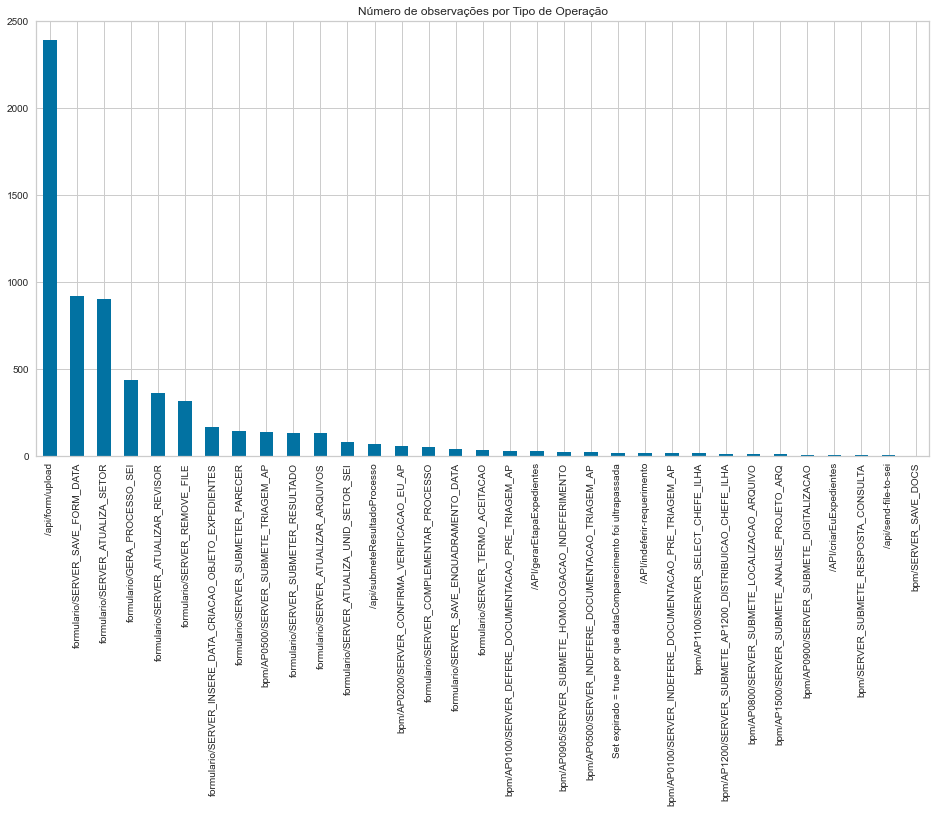

In [21]:
# Visualização de gráfico de Números de Observações por Tipo de Operação executada no sistema
# equivalente ao histograma

_ = plt.figure(figsize=(16, 8))
_ = X['operations.0'].value_counts().plot(kind="bar")
_ = plt.title("Número de observações por Tipo de Operação")
_ = plt.ylim(0, 2500)

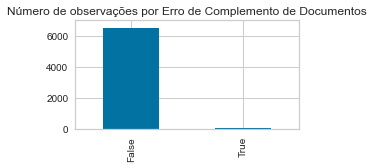

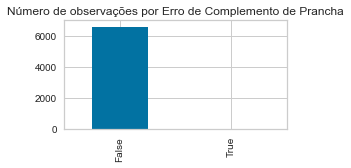

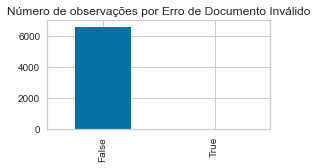

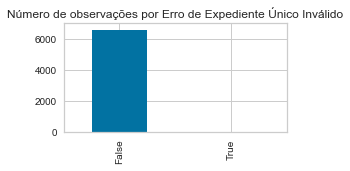

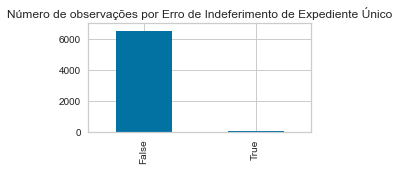

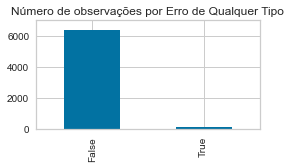

In [22]:
# Visualização de gráficos de Números de Observações por Tipos de Erros

def plota_grafico(df, rotulo, nomeRotulo):
    _ = plt.figure(figsize=(4, 2))
    _ = df[rotulo].value_counts().plot(kind="bar")
    _ = plt.title("Número de observações por Erro de " + str(nomeRotulo))
    _ = plt.ylim(0, 7000)

plota_grafico(df, 'rotuloErroComplementoDocs', "Complemento de Documentos")
plota_grafico(df, 'rotuloErroComplementoPrancha', "Complemento de Prancha")
plota_grafico(df, 'rotuloErroDocumentoInvalido', "Documento Inválido")
plota_grafico(df, 'rotuloExpedienteUnicoInvalido', "Expediente Único Inválido")
plota_grafico(df, 'rotuloIndeferimentoExpedienteUnico', "Indeferimento de Expediente Único")
plota_grafico(df, 'rotuloPossuiErro', "Qualquer Tipo")

### 4.3. Visualização de dashboards sobre os atributos

In [23]:
df_columns = X.columns # apenas as colunas selecionadas

# Cria array com apenas colunas que não sejam de Documentos, para gerações de dashboards automatizados, pois muitas colunas compromete a geração dos dashboards

columns_to_analize = []
for idx, coluna in enumerate(df_columns):
    if(coluna.startswith('documentos.') == False):
        columns_to_analize.append(coluna)

# Não usado:
columns_to_analize_sem_bpmTasks = []
for idx2, coluna2 in enumerate(columns_to_analize):
    if(coluna2.startswith('bpmTasks.') == False):
        columns_to_analize_sem_bpmTasks.append(coluna2)
        
#columns_to_analize

In [24]:
# GERAÇÃO DE RELATÓRIO COM DETALHES ATRAVÉS DO pandas_profiling

#pandas_profiling.ProfileReport(df) # por ter muitas colunas, compromete a geração dos dashboards, alternativa é usar columns_to_analize
#pandas_profiling.ProfileReport(df[columns_to_analize])

# Usando o dataframe com os atributos selecionados para a modelagem
pandas_profiling.ProfileReport(X[columns_to_analize])

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# dashboard automatizado, com sweetviz

#report = sv.analyze(df[columns_to_analize], pairwise_analysis='on') # por ter muitas colunas, usar o dataframe sem ser com columns_to_analize compromete a geração dos dashboards

# Usando o dataframe com os atributos selecionados para a modelagem
report = sv.analyze(X[columns_to_analize], pairwise_analysis='on')

report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 4.4. Análises comparativas entre atributos através de gráficos
Os atributos relativos a Documentos não foram considerados para as análises, pois possuem um número bastante elevado, prejudicando a geração de gráficos e a visualização. Além disso por serem muitos documentos variados, é difícil analisar de forma específica as visualizações através de gráficos, então opta-se por considerá-los apenas no treinamento dos modelos de Aprendizado de Máquina.

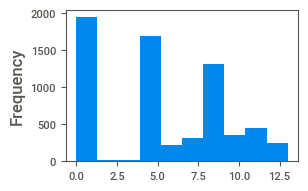

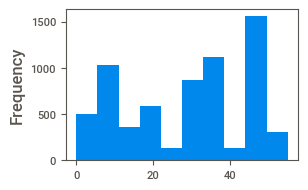

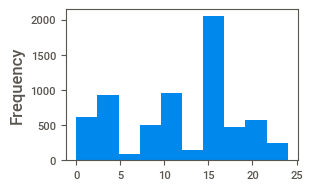

In [26]:
# Histogramas

def plota_grafico(atributo):
    fig, ax = plt.subplots(figsize=(3, 2))
    X_labeled[atributo].plot(kind="hist", ax=ax)

plota_grafico('dadosFormulario.idTipoFormulario')
plota_grafico('dadosFormulario.idTipoProcessoSei')
plota_grafico('dadosFormulario.idUnidadeSei')

#fig.savefig("images/mlpr_0601.png", dpi=300)

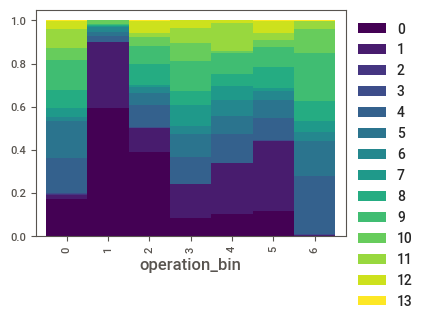

In [27]:
#print(X['operations.0'].unique().size)
#print(X['dadosFormulario.idTipoFormulario'].unique().size)

# Gráfico para comparação de valores ordinais para ter ideia de distribuição de tipo de formulário por operações

fig, ax = plt.subplots(figsize=(4, 3))
(
    X.assign(
        #age_bin=pd.qcut(
        operation_bin=pd.qcut(
            #X.age, q=10, labels=False
            #X_labeled['operations.0'], q=34, labels=False
            X_labeled['operations.0'], q=10, labels=False #divididas as operations em 10 quantis
            , duplicates='drop' #adicionado
        ),
        #class_bin=pd.cut(
        tipo_bin=pd.cut(
            #X.pclass, bins=3, labels=False
            X_labeled['dadosFormulario.idTipoFormulario'], bins=14, labels=False # há 14 tipos de formulários diferentes
            , duplicates='drop' #adicionado
        ),
    )
    #.groupby(["age_bin", "class_bin"])
    .groupby(["operation_bin", "tipo_bin"])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(
        stacked=True,
        width=1,
        ax=ax,
        cmap="viridis",
    )
    .legend(bbox_to_anchor=(1, 1))
)
#fig.savefig(
#     "image/mlpr_0609.png",
#     dpi=300,
#     bbox_inches="tight",
# )

### 4.5. Análises de Correlações entre Atributos
Não são consideradas as correlações com os alvos (rótulos), pois, como estratégia, considera-se que qualquer atributo pode ser determinante para a previsão de um erro (alvo na geração do modelo de Aprendizado de Máquina).

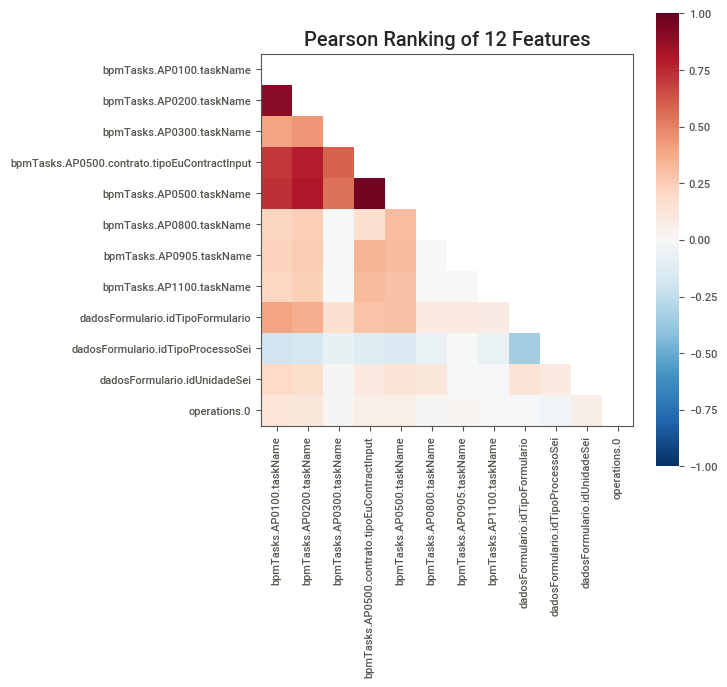

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [28]:
# Gráfico de Correlação de Covariância

from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(
    features=X_labeled[columns_to_analize].columns, algorithm="pearson"
)
pcv.fit(X_labeled[columns_to_analize], y_series[rotuloPossuiErro])
#rotuloPossuiErro 
#rotuloErroComplementoDocs
#rotuloErroComplementoPrancha
#rotuloErroDocumentoInvalido
#rotuloExpedienteUnicoInvalido
#rotuloIndeferimentoExpedienteUnico
pcv.transform(X_labeled[columns_to_analize])
pcv.poof()
# fig.savefig(
#     "images/mlpr_0610.png",
#     dpi=300,
#     bbox_inches="tight",
#)

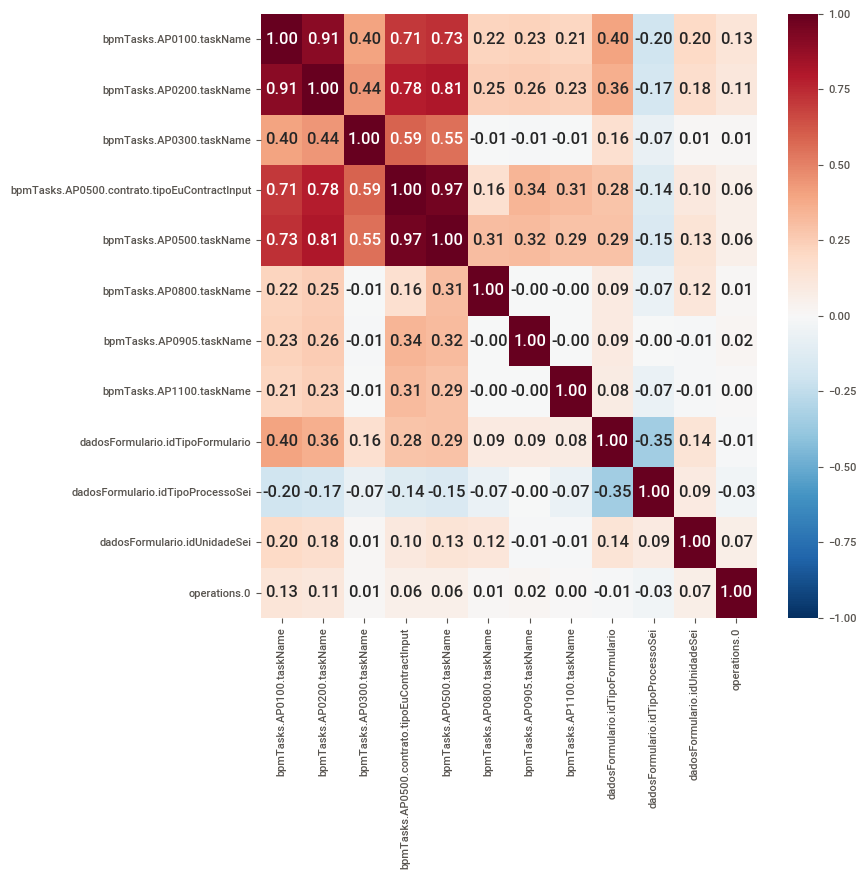

In [29]:
# Mapa de Calor

from seaborn import heatmap

fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    X_labeled[columns_to_analize].corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)
# fig.savefig(
#     "images/mlpr_0611.png",
#     dpi=300,
#     bbox_inches="tight",
# )

In [30]:
X_labeled.corr()#.iloc[:, :2]

bpmTasks.AP0100.taskName  \
bpmTasks.AP0100.taskName                                      1.000000   
bpmTasks.AP0200.taskName                                      0.905942   
bpmTasks.AP0300.taskName                                      0.400394   
bpmTasks.AP0500.contrato.tipoEuContractInput                  0.708866   
bpmTasks.AP0500.taskName                                      0.731740   
...                                                                ...   
documentos.smic.tituloDocumento                              -0.033051   
documentos.term-conce.extensao                               -0.029700   
documentos.term-conce.idDocumento                            -0.029700   
documentos.term-conce.tituloDocumento                        -0.029700   
operations.0                                                  0.132358   

                                              bpmTasks.AP0200.taskName  \
bpmTasks.AP0100.taskName                                      0.905942   
bpmTasks.AP0200.taskName                                      1.000000   
bpmTasks.AP0300.taskName                                      0.441964   
bpmTasks.AP0500.contrato.tipoEuContractInput                  0.782463   
bpmTasks.AP0500.taskName                                      0.807712   
...                                                                ...   
documentos.smic.tituloDocumento                              -0.029942   
documentos.term-conce.extensao                               -0.026907   
documentos.term-conce.idDocumento                            -0.026907   
documentos.term-conce.tituloDocumento                        -0.026907   
operations.0                                                  0.110204   

                                              bpmTasks.AP0300.taskName  \
bpmTasks.AP0100.taskName                                      0.400394   
bpmTasks.AP0200.taskName                                      0.441964   
bpmTasks.AP0300.taskName                                      1.000000   
bpmTasks.AP0500.contrato.tipoEuContractInput                  0.589248   
bpmTasks.AP0500.taskName                                      0.547181   
...                                                                ...   
documentos.smic.tituloDocumento                              -0.013233   
documentos.term-conce.extensao                               -0.011892   
documentos.term-conce.idDocumento                            -0.011892   
documentos.term-conce.tituloDocumento                        -0.011892   
operations.0                                                  0.014968   

                                              bpmTasks.AP0500.contrato.tipoEuContractInput  \
bpmTasks.AP0100.taskName                                                          0.708866   
bpmTasks.AP0200.taskName                                                          0.782463   
bpmTasks.AP0300.taskName                                                          0.589248   
bpmTasks.AP0500.contrato.tipoEuContractInput                                      1.000000   
bpmTasks.AP0500.taskName                                                          0.968740   
...                                                                                    ...   
documentos.smic.tituloDocumento                                                  -0.023429   
documentos.term-conce.extensao                                                   -0.021054   
documentos.term-conce.idDocumento                                                -0.021054   
documentos.term-conce.tituloDocumento                                            -0.021054   
operations.0                                                                      0.060411   

                                              bpmTasks.AP0500.taskName  \
bpmTasks.AP0100.taskName                                      0.731740   
bpmTasks.AP0200.taskName                                      0.807712   
bpmTasks.AP0300.taskName    

In [31]:
# Esta célula se repete na Modelagem de Machine Learning

def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )
c_df = correlated_columns(X_labeled)
#c_df

In [38]:
#c_df = correlated_columns(agg_df.select_dtypes('number'))
#c_df = correlated_columns(X_labeled)
c_df.style.format({"pearson": "{:.2f}"})

### 4.6. Análises comparativas com os alvos (rótulos)

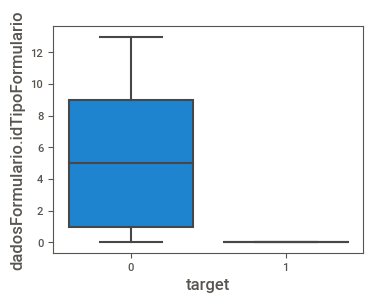

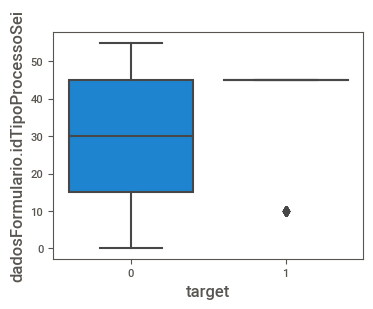

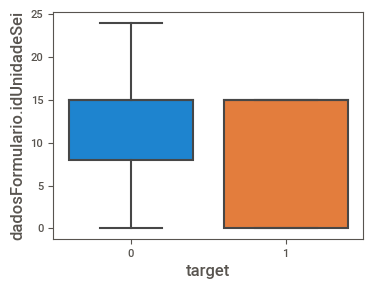

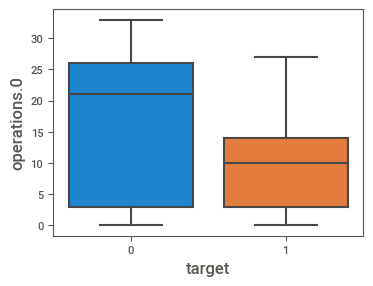

In [32]:
# Gráfico de Caixas (Box Plot)

from seaborn import boxplot

def plota_grafico(atributo):
    fig, ax = plt.subplots(figsize=(4, 3))
    # boxplot(x="target", y="age", data=new_df)
    boxplot(x="target", y=atributo, data=new_df)

new_df = X_labeled.copy()
new_df["target"] = y_series[rotuloPossuiErro] # usando rótulo genérico

plota_grafico('dadosFormulario.idTipoFormulario')
plota_grafico('dadosFormulario.idTipoProcessoSei')
plota_grafico('dadosFormulario.idUnidadeSei')
plota_grafico('operations.0')

#fig.savefig("images/mlpr_0607.png", dpi=300)

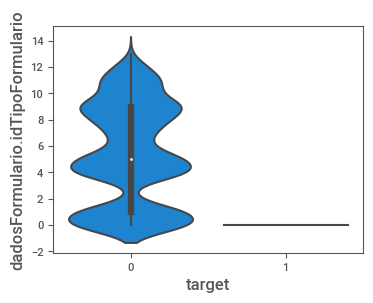

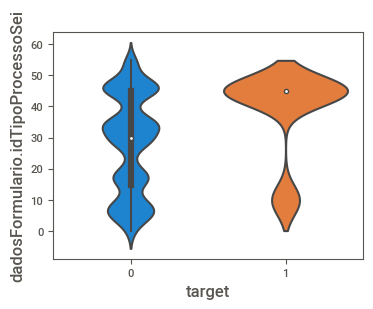

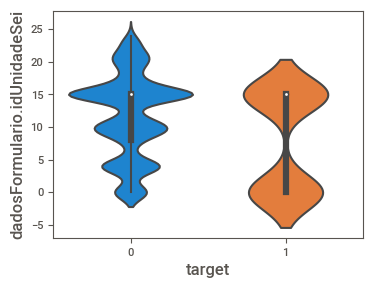

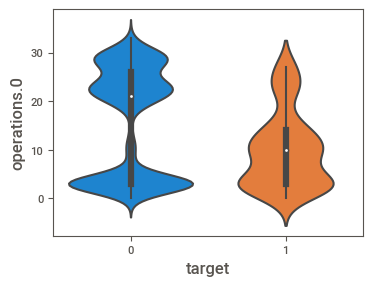

In [33]:
# Gráfico Violino (Violin Plot)

from seaborn import violinplot

def plota_grafico(atributo):
    fig, ax = plt.subplots(figsize=(4, 3))

    #violinplot(x="target", y="sex_male", data=new_df)
    violinplot(x="target", y=atributo, data=new_df)

new_df = X_labeled.copy()
new_df["target"] = y_series[rotuloPossuiErro] # usando rótulo genérico

plota_grafico('dadosFormulario.idTipoFormulario')
plota_grafico('dadosFormulario.idTipoProcessoSei')
plota_grafico('dadosFormulario.idUnidadeSei')
plota_grafico('operations.0')

#fig.savefig("images/mlpr_0608.png", dpi=300)

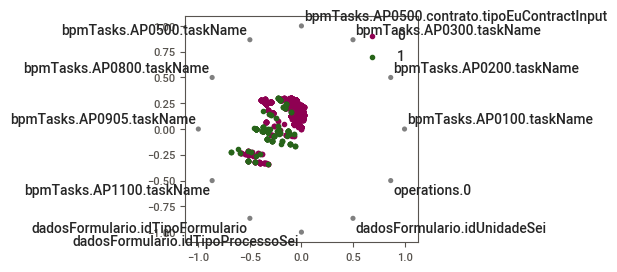

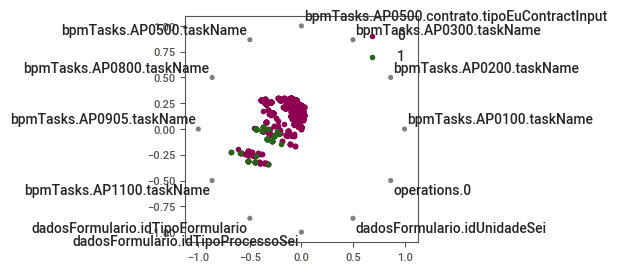

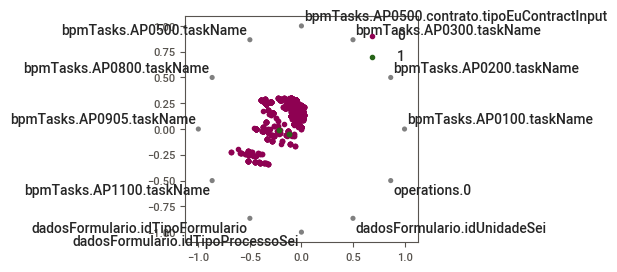

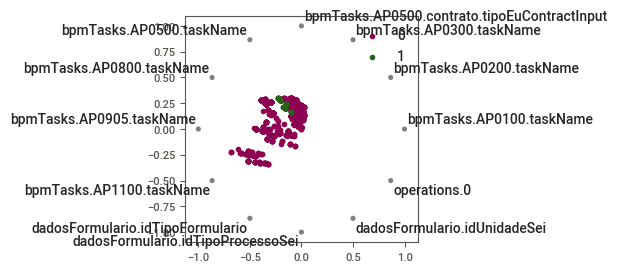

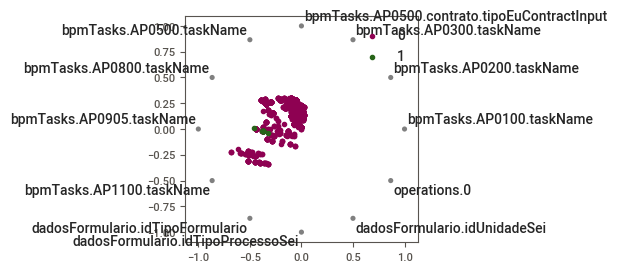

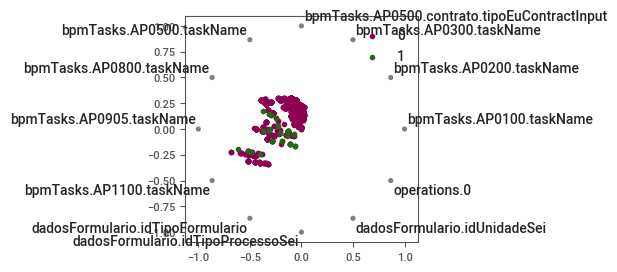

In [34]:
from pandas.plotting import radviz

def plota_grafico(new_df):
    fig, ax = plt.subplots(figsize=(3, 3))

    radviz(
        new_df, "target", ax=ax, colormap="PiYG"
    )

# para uso por rótulos
new_dfs_por_rotulos = {}

for idx, rotulo in enumerate(rotulos):
    new_dfs_por_rotulos[rotulo] = X_labeled[columns_to_analize].copy()    
    new_dfs_por_rotulos[rotulo]["target"] = y_series[rotulo]
    plota_grafico(new_dfs_por_rotulos[rotulo])
    #fig.savefig("images/mlpr_0613.png", dpi=300)

<ipython-input-35-1778ac8593a2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


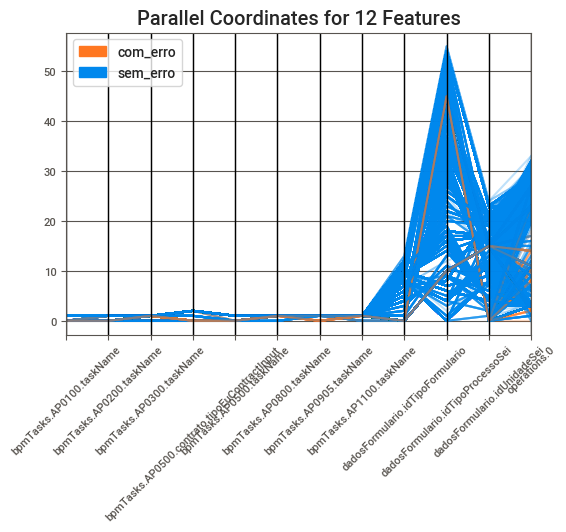

<AxesSubplot:title={'center':'Parallel Coordinates for 12 Features'}>

In [35]:
from yellowbrick.features import (
    ParallelCoordinates,
)
fig, ax = plt.subplots(figsize=(6, 4))
pc = ParallelCoordinates(
    classes=["sem_erro", "com_erro"],
    features=X_labeled[columns_to_analize].columns,
)
pc.fit(X_labeled[columns_to_analize], y_series[rotuloPossuiErro])
pc.transform(X_labeled[columns_to_analize])
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)
pc.poof()
#fig.savefig("images/mlpr_0614.png", dpi=300)


## Versão com o Pandas:
#from pandas.plotting import (
#    parallel_coordinates,
#)
#fig, ax = plt.subplots(figsize=(6, 4))
#new_df = X_labeled[columns_to_analize].copy()
#new_df["target"] = y_series[rotuloPossuiErro]
#parallel_coordinates(
#    new_df,
#    "target",
#    ax=ax,
#    colormap="viridis",
#    alpha=0.5,
#)
#ax.set_xticklabels(
#    ax.get_xticklabels(), rotation=45
#)
## fig.savefig(
##     "images/mlpr_0615.png",
##     dpi=300,
##     bbox_inches="tight",
## )

---

## 5. Modelagem de Machine Learning
### 5.1. Observações iniciais
#### Utilização de técnicas de redução de dimensionalidade:
Pela estratégia de considerar que todos os atributos podem ser importantes na previsão dos alvos, técnicas para Redução de Dimensionalidade de colunas não são aplicadas para não prejudicar as previsões. Em consonância com a ideia de redução de atributos para otimizar os modelos, já é feita uma remoção de atributos que estejam fortemente correlacionados.
#### Utilização de técnicas para detecção de outliers:
Como se considera que foi feita uma avaliação sobre os dados diretamente no dataset, bem como uma limpeza de discrepâncias nos dados, técnicas para detecção de outliers não são aplicadas. 
#### Utilização de técnicas para balanceamento de classes:
Ao observar o contexto do problema, que é a detecção de Erros, e sendo os dados do dataset provenientes da base de dados de Produção, se considera que os erros são casos raros, tendo um peso proporcional já distribuído em conjunto com o restante dos registros sem erros. Assume-se, então, que as classes estejam já devidamente balanceadas, não exigindo maiores técnicas para Balanceamento de Classes.
#### Adequações de dados numéricos contínuos para o modelo:
Como não há dados numéricos contínuos (medidas) no Dataframe, não se faz necessário pré-processamento como padronização de dados e escala para um intervalo.


### 5.2. Adequações para a Modelagem
#### Redução por colunas correlacionadas:

In [36]:
# Esta célula se repete na Análise Exploratória

def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )
c_df = correlated_columns(X_labeled)
#c_df

In [37]:
# Armazenamento de colunas a serem deletadas na Modelagem de Machine Learning, para otimização do modelo
colunas_correlacionadas = c_df['level_0']

X_labeled_modif = X_labeled.copy()

c_df['level_0']
#for idx, column in enumerate(c_df['level_0']):
#    print(column)

X_labeled = X_labeled_modif.drop(columns=colunas_correlacionadas)

In [38]:
X_labeled.shape

(6583, 517)

#### Adequação de dados categóricos para o modelo:
A adequação é feita após a divisão de teste e treino para não causar vazamento de informações. Ou seja, se utiliza os dados de treinamento como base, para então transformar os de teste.

In [39]:
# Transformação de dados categóricos com Codificação One-Hot, para adequação ao Modelo

import category_encoders as ce

encoder = ce.OneHotEncoder(cols=X_labeled.columns)

#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

#X_onde_hot_encoded = encoder.transform(X)
# transformação pode ser feita diretamente em X, pois os números de categorias devem ser correspondentes nos dados de teste e treinamento
# também é colocado em X para uso posterior em gráfico de CURVA DE APRENDIZADO
X_one_hot_encoded = encoder.fit_transform(X_labeled)

c:\users\bianca porto\env3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


#### Separação de amostras de Treinamento e Teste:

In [101]:
def dividir_dados_teste_treino(X, y):
    # SEPARAÇÃO DOS DADOS DE TESTE E TREINAMENTO

    #X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42 # usando random-state=42 para eliminar a aleatoriedade no caso de comparar diferentes modelos
    )

    #X_train, X_test, y_train, y_test = train_test_split(
    #    X, y, test_size=0.3, random_state=999
    #)
    
    # concatenação para uso do X e Y para uso nos modelos
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    
    return X_train, X_test, y_train, y_test, X, y

# para uso por rótulos
X_train_dataframes = {}
X_test_dataframes = {}
y_train_series = {}
y_test_series = {}

X_dataframes_concat = {}
y_series_concat = {}

for idx, rotulo in enumerate(rotulos):
    X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo], X_dataframes_concat[rotulo], y_series_concat[rotulo] = dividir_dados_teste_treino(X_one_hot_encoded, y_series[rotulo])

### 5.3. Testes com múltiplos modelos
Gerações de múltiplos modelos para servir como base de comparação.

#### Modelo de base:

In [102]:
# Função para geração do Modelo de Base
def gerar_modelo_base(X_train, X_test, y_train, y_test):
    ######################
    # Criação do Modelo de Base

    # DummyClassifier
    from sklearn.dummy import DummyClassifier
    bm = DummyClassifier()
    bm.fit(X_train, y_train)
    
    prints = []
    
    prints.append("Precisão do modelo: " + str(bm.score(X_test, y_test)))  # accuracy
    # a precisão (accuracy) pode ser enganosa
    
    ######################
    # metrics
    from sklearn import metrics
    #print(metrics.precision_score(
    #    y_test, bm.predict(X_test)#, zero_division = 1
    #))    
    prints.append("Métrica de precisão: " + str(metrics.precision_score(
        y_test, bm.predict(X_test)#, zero_division = 1
    )))
    return prints
    ######################

In [103]:
# Geração do Modelo de Base para previsão de cada um dos rótulos

# função para prints
def print_modelo_base(rotulo, X_train, X_test, y_train, y_test):
    print("Modelo Base para: " + rotulo)
    prints = gerar_modelo_base(X_train, X_test, y_train, y_test)
    for p in prints:
        print(p)
    print("-------------------------------------------------")

for idx, rotulo in enumerate(rotulos):
    print_modelo_base(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo])

Modelo Base para: rotuloPossuiErro
Precisão do modelo: 0.9756962025316456
Métrica de precisão: 0.0
-------------------------------------------------
Modelo Base para: rotuloErroComplementoDocs
Precisão do modelo: 0.9878481012658228
Métrica de precisão: 0.0
-------------------------------------------------
Modelo Base para: rotuloErroComplementoPrancha
Precisão do modelo: 1.0
Métrica de precisão: 0.0
-------------------------------------------------
Modelo Base para: rotuloErroDocumentoInvalido
Precisão do modelo: 0.9949367088607595
Métrica de precisão: 0.0
-------------------------------------------------
Modelo Base para: rotuloExpedienteUnicoInvalido
Precisão do modelo: 0.9979746835443037
Métrica de precisão: 0.0
-------------------------------------------------
Modelo Base para: rotuloIndeferimentoExpedienteUnico
Precisão do modelo: 0.9949367088607595
Métrica de precisão: 0.0
-------------------------------------------------


c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Pr

#### Modelos de diversas famílias de algoritmos:

In [104]:
# Função para geração de Modelos de Várias Famílias de Algoritmos
def gerar_modelos_varias_familias(X_train, X_test, y_train, y_test):
    ######################
    # Criação e teste em diversos algoritmos de Machine Learning

    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])

    # importações
    from sklearn import model_selection
    from sklearn.dummy import DummyClassifier
    from sklearn.linear_model import (
        LogisticRegression,
    )
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import (
        KNeighborsClassifier,
    )
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import (
        RandomForestClassifier,
    )
    import xgboost

    prints = []

    # Verificação das pontuações média (AUC) e desvio padrão (STD) pelos modelos, por validação cruzada
    for model in [
        DummyClassifier,
        LogisticRegression,
        DecisionTreeClassifier,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier,
        xgboost.XGBClassifier,
    ]:
        cls = model()
        kfold = model_selection.KFold(
            #n_splits=10, random_state=42
            n_splits=10#, random_state=
        )
        s = model_selection.cross_val_score(
            cls, X, y, scoring="roc_auc", cv=kfold
        )
        #print(
        #    f"{model.__name__:22}  AUC: "
        #    f"{s.mean():.3f} STD: {s.std():.2f}"
        #)
        prints.append(f"{model.__name__:22}  AUC: " + f"{s.mean():.3f} STD: {s.std():.2f}")
    ######################
    # Exibição dos resultados

    #for p in prints:
    #    print(p)
    ######################
    # Verificações de pontuações através do Classificador Stacking (Empilhamento)

    from mlxtend.classifier import (
        StackingClassifier,
    )
    clfs = [
        x()
        for x in [
            LogisticRegression,
            DecisionTreeClassifier,
            KNeighborsClassifier,
            GaussianNB,
            SVC,
            RandomForestClassifier,
        ]
    ]
    stack = StackingClassifier(
        classifiers=clfs,
        meta_classifier=LogisticRegression(),
    )
    kfold = model_selection.KFold(
        #n_splits=10, random_state=42
        n_splits=10#, random_state=None
    )
    s = model_selection.cross_val_score(
        stack, X, y, scoring="roc_auc", cv=kfold
    )
    #print(
    #    f"{stack.__class__.__name__}  "
    #    f"AUC: {s.mean():.3f}  STD: {s.std():.2f}"
    #)
    prints.append(
        f"{stack.__class__.__name__}  " 
        f"AUC: {s.mean():.3f}  STD: {s.std():.2f}"
    )
    return prints
    ######################

In [ ]:
# Geração do Modelos de Várias Famílias de Algoritmos para previsão de cada um dos rótulos

# função para prints
def print_modelos_varias_familias(rotulo, X_train, X_test, y_train, y_test):
    prints = []
    prints.append("Modelos de Várias Famílias para: " + str(rotulo))
    prints_modelo = gerar_modelos_varias_familias(X_train, X_test, y_train, y_test)
    for idx, p in enumerate(prints_modelo):
        prints.append(p)
    prints.append("-------------------------------------------------")
    return prints

# Criado array de prints para exibir só no final, pois a tela fica muito poluída pelos warnings
prints = []
# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
for idx, rotulo in enumerate(rotulos):
    #rotulo = 'rotuloPossuiErro'
    prints = prints + print_modelos_varias_familias(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo])

for idx, p in enumerate(prints):
    print(p)

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

[09:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

[09:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

[09:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

[09:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py"

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_ranking.py", line 542, in roc_auc_score
    return _average_binary_sco

c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\bianca porto\env3\lib\site-packa

[09:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __ca

[09:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bianca porto\env3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

#### Modelos de Floresta Aleatória:

In [86]:
# Função para geração de Modelo de Floresta Aleatória
def gerar_modelo_random_forest(X_train, X_test, y_train, y_test):
    ######################
    # Criação do Modelo de Classificador de Floresta Aleatória (Ramdom Forest)

    rf = ensemble.RandomForestClassifier(
        n_estimators=100, random_state=42
    )
    rf.fit(X_train, y_train)
    ######################
    # Avaliação do Modelo de Floresta Aleatória

    prints = []

    # média da precisão da medição
    #print(rf.score(X_test, y_test))
    prints.append("Precisão do modelo: " + str(rf.score(X_test, y_test)))

    # importação para funcionar variável no escopo da função
    from sklearn import metrics

    # métrica de precisão 
    #print(metrics.precision_score(
    #    y_test, rf.predict(X_test)
    #))
    prints.append("Métrica de precisão: " + str(metrics.precision_score(
        y_test, rf.predict(X_test)
    )))
    ######################
    # Inspeção da Importância dos Atributos

    prints.append("Importância dos atributos: ")
    for col, val in sorted(
        zip(
            X_train.columns,
            rf.feature_importances_,
        ),
        key=lambda x: x[1],
        reverse=True,
    )[:10]:
        #print(f"{col:10}{val:10.3f}")
        prints.append(f"{col:10}{val:10.3f}")

    return prints
    ######################

In [87]:
# Geração de Modelo de Floresta Aleatória para previsão de cada um dos rótulos

# função para prints
def print_modelo_random_forest(rotulo, X_train, X_test, y_train, y_test):
    print("Modelo de Floresta Aleatória para: " + rotulo)
    prints_modelo = gerar_modelo_random_forest(X_train, X_test, y_train, y_test)
    for idx, p in enumerate(prints_modelo):
        print(p)
    print("-------------------------------------------------")

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
for idx, rotulo in enumerate(rotulos):
    print_modelo_random_forest(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo])

Modelo de Floresta Aleatória para: rotuloPossuiErro
Precisão do modelo: 0.9959493670886076
Métrica de precisão: 0.9545454545454546
Importância dos atributos: 
bpmTasks.AP0100.taskName_1     0.071
bpmTasks.AP0500.contrato.tipoEuContractInput_1     0.070
bpmTasks.AP0100.taskName_2     0.066
operations.0_12     0.058
bpmTasks.AP0500.contrato.tipoEuContractInput_2     0.056
bpmTasks.AP0200.taskName_1     0.042
bpmTasks.AP0905.taskName_2     0.037
operations.0_9     0.034
bpmTasks.AP0200.taskName_2     0.031
operations.0_27     0.030
-------------------------------------------------
Modelo de Floresta Aleatória para: rotuloErroComplementoDocs
Precisão do modelo: 0.9969620253164557
Métrica de precisão: 0.9090909090909091
Importância dos atributos: 
operations.0_12     0.145
operations.0_18     0.071
bpmTasks.AP0500.contrato.tipoEuContractInput_2     0.056
operations.0_21     0.055
bpmTasks.AP0500.contrato.tipoEuContractInput_1     0.052
operations.0_23     0.039
bpmTasks.AP0200.taskName_2   

c:\users\bianca porto\env3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão do modelo: 1.0
Métrica de precisão: 0.0
Importância dos atributos: 
operations.0_12     0.282
operations.0_32     0.149
bpmTasks.AP1100.taskName_2     0.123
bpmTasks.AP1100.taskName_1     0.107
operations.0_31     0.040
operations.0_29     0.038
operations.0_30     0.036
dadosFormulario.idTipoProcessoSei_5     0.031
operations.0_28     0.026
dadosFormulario.idUnidadeSei_4     0.024
-------------------------------------------------
Modelo de Floresta Aleatória para: rotuloErroDocumentoInvalido
Precisão do modelo: 1.0
Métrica de precisão: 1.0
Importância dos atributos: 
operations.0_9     0.189
bpmTasks.AP0100.taskName_2     0.151
bpmTasks.AP0100.taskName_1     0.138
operations.0_10     0.067
operations.0_4     0.045
bpmTasks.AP0200.taskName_1     0.043
bpmTasks.AP0200.taskName_2     0.031
operations.0_15     0.031
operations.0_16     0.029
documentos.lista 04 enquadramento - documento 7.idDocumento_2     0.025
-------------------------------------------------
Modelo de Floresta

In [88]:
# Função para geração de Modelo de Floresta Aleatória com otimização
def gerar_modelo_random_forest_otimizada(X_train, X_test, y_train, y_test):
    ######################
    # Otimização do Modelo de Floresta Aleatória, com Hiperparâmetros

    # importação para funcionar variável no escopo da função
    from sklearn import model_selection

    # melhores parâmetros
    rf4 = ensemble.RandomForestClassifier()
    params = {
        "max_features": [0.4, "auto"],
        "n_estimators": [15, 200],
        "min_samples_leaf": [1, 0.1],
        "random_state": [42],
    }
    cv = model_selection.GridSearchCV(
        rf4, params, n_jobs=-1
    ).fit(X_train, y_train)
    
    prints = []
    
    #print(cv.best_params_)
    prints.append("Melhores parâmetros: ")
    prints.append(cv.best_params_)
    
    # score
    rf5 = ensemble.RandomForestClassifier(
        **{
            "max_features": "auto",
            "min_samples_leaf": 0.1,
            "n_estimators": 200,
            "random_state": 42,
        }
    )
    rf5.fit(X_train, y_train)
    #print(rf5.score(X_test, y_test))
    prints.append("Precisão do modelo: " + str(rf5.score(X_test, y_test)))    
    return prints
    ######################

In [89]:
# Geração de Modelo de Random Forest Otimizada para previsão de cada um dos rótulos

# função para prints
def print_gera_modelo_random_forest_otimizada(rotulo, X_train, X_test, y_train, y_test):
    print("Modelo de Floresta Aleatória com otimização para: " + rotulo)
    prints_modelo = gerar_modelo_random_forest_otimizada(X_train, X_test, y_train, y_test)
    for idx, p in enumerate(prints_modelo):
        print(p)
    print("-------------------------------------------------")
    
# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
for idx, rotulo in enumerate(rotulos):
    print_gera_modelo_random_forest_otimizada(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo])

Modelo de Floresta Aleatória com otimização para: rotuloPossuiErro
Melhores parâmetros: 
{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 0.9756962025316456
-------------------------------------------------
Modelo de Floresta Aleatória com otimização para: rotuloErroComplementoDocs
Melhores parâmetros: 
{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 0.9878481012658228
-------------------------------------------------
Modelo de Floresta Aleatória com otimização para: rotuloErroComplementoPrancha


c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Melhores parâmetros: 
{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 1.0
-------------------------------------------------
Modelo de Floresta Aleatória com otimização para: rotuloErroDocumentoInvalido
Melhores parâmetros: 
{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 0.9949367088607595
-------------------------------------------------
Modelo de Floresta Aleatória com otimização para: rotuloExpedienteUnicoInvalido
Melhores parâmetros: 
{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 0.9979746835443037
-------------------------------------------------
Modelo de Floresta Aleatória com otimização para: rotuloIndeferimentoExpedienteUnico
Melhores parâmetros: 
{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}
Precisão do modelo: 0.9949367088607595
-----------------------------------

### 5.4. Geração de Modelos baseados em Árvore
Foram selecionados os modelos baseados em Árvore, por serem pertinentes para Classificação em Machine Learning. São gerados e inspecionados os modelos relativos a Árvore de Decisão, Floresta Aleatória e XGBoost

#### 5.4.1. Árvore de Decisão
##### Geração do modelo:

In [99]:
# Função para geração do Modelo de Árvore de Decisão
def gerar_modelo_decision_tree(X_train, X_test, y_train, y_test, X):
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(
        random_state=42, max_depth=3
    )
    dt.fit(X_train, y_train)
    prints = []
    prints.append("Precisão do modelo: " + str(dt.score(X_test, y_test)))
    dt.predict(X.iloc[[0]])
    dt.predict_proba(X.iloc[[0]])
    dt.predict_log_proba(X.iloc[[0]])
    return dt, prints

In [100]:
# Geração de Modelo de Árvore de Decisão para previsão de cada um dos rótulos

# função para prints
def print_gera_modelo_decision_tree(rotulo, X_train, X_test, y_train, y_test, X):
    print("Modelo de Árvore de Decisão para: " + rotulo)
    dt, prints_modelo = gerar_modelo_decision_tree(X_train, X_test, y_train, y_test, X)
    for idx, p in enumerate(prints_modelo):
        print(p)
    print("-------------------------------------------------")
    return dt

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
dts_por_rotulo = {}
for idx, rotulo in enumerate(rotulos):
    dts_por_rotulo[rotulo] = print_gera_modelo_decision_tree(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo], X_dataframes_concat[rotulo])

Modelo de Árvore de Decisão para: rotuloPossuiErro
Precisão do modelo: 0.9913924050632912
-------------------------------------------------
Modelo de Árvore de Decisão para: rotuloErroComplementoDocs


FloatingPointError: divide by zero encountered in log

##### Inspeção do modelo:

In [96]:
# Variáveis a serem usadas

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rotulo_dt = rotuloPossuiErro

dt = dts_por_rotulo[rotulo_dt]
X_dt = X_dataframes_concat[rotulo_dt]
y_dt = y_series_concat[rotulo_dt]

In [97]:
# Inclui no PATH a variável de ambiente do GRAPHVIZ para funcionamento da geração de imagem para a árvore
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

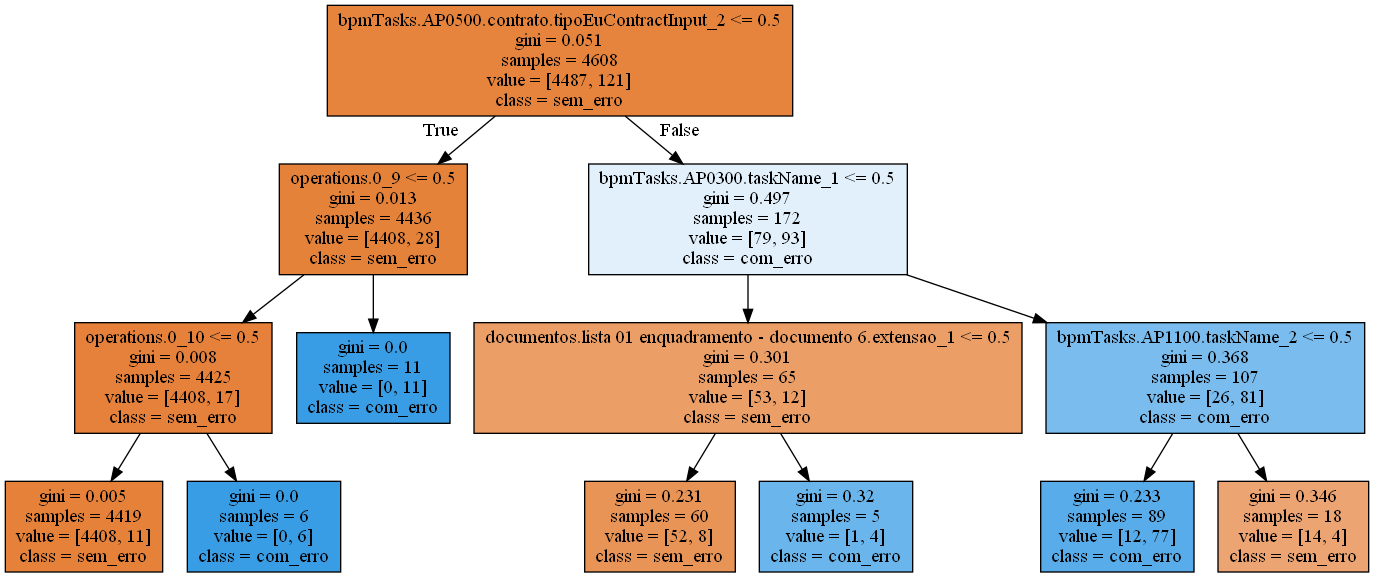

In [98]:
# Visualização da Árvore de Decisão

import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X_dt.columns,
    class_names=["sem_erro", "com_erro"],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()    
)
#g.write_png("images/mlpr_1002.png")
from IPython.display import Image 
Image(g.create_png())

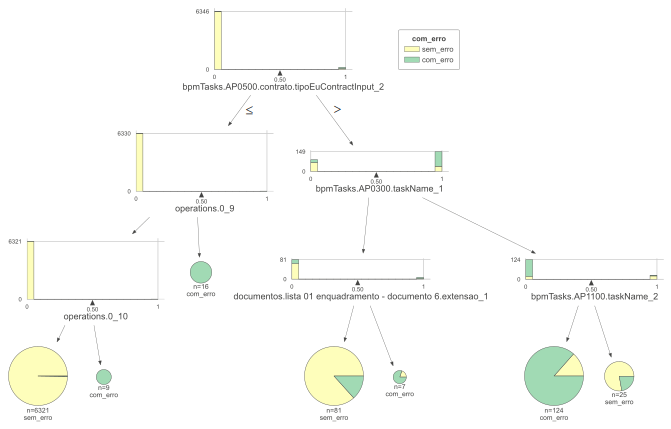

In [76]:
# Saída do dtreeviz

import dtreeviz.trees
viz = dtreeviz.trees.dtreeviz(
    dt,
    X_dt,
    y_dt,
    target_name="com_erro",
    feature_names=X_dt.columns,
    class_names=["sem_erro", "com_erro"],
)
viz

In [71]:
# Importância dos Atributos

for col, val in sorted(
    zip(X_dt.columns, dt.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:10]:
    print(f"{col:10}{val:10.3f}")

bpmTasks.AP0500.contrato.tipoEuContractInput_2     0.552
bpmTasks.AP0300.taskName_1     0.155
operations.0_9     0.127
bpmTasks.AP1100.taskName_2     0.072
operations.0_10     0.070
documentos.lista 01 enquadramento - documento 6.extensao_1     0.024
bpmTasks.AP0100.taskName_1     0.000
bpmTasks.AP0100.taskName_2     0.000
bpmTasks.AP0200.taskName_1     0.000
bpmTasks.AP0200.taskName_2     0.000


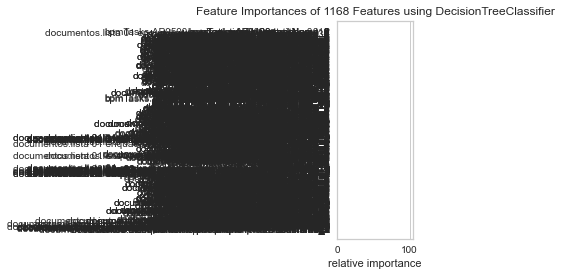

<AxesSubplot:title={'center':'Feature Importances of 1168 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [119]:
# Gráfico de Visualização da Importância dos Atributos

#from yellowbrick.features.importances import (
from yellowbrick.model_selection import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X_dt, y_dt)
fi_viz.poof()
#fig.savefig("images/mlpr_1004.png", dpi=300)

#### 5.4.2. Floresta Aleatória

##### Geração do modelo:

In [73]:
# Função para geração do modelo de Floresta Aleatória
def gerar_modelo_random_forest(X_train, X_test, y_train, y_test, X):
    from sklearn.ensemble import (
        RandomForestClassifier,
    )
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    prints = []
    prints.append("Precisão do modelo: " + str(rf.score(X_test, y_test)))
    rf.predict(X.iloc[[0]])
    rf.predict_proba(X.iloc[[0]])
    rf.predict_log_proba(X.iloc[[0]])
    return rf, prints

In [74]:
# Geração de Modelo de Random Forest para previsão de cada um dos rótulos

# função para prints
def print_gera_modelo_random_forest(rotulo, X_train, X_test, y_train, y_test, X):
    print("Modelo de Random Forest para: " + rotulo)
    rf, prints_modelo = gerar_modelo_random_forest(X_train, X_test, y_train, y_test, X)
    for idx, p in enumerate(prints_modelo):
        print(p)
    print("-------------------------------------------------")
    return rf

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rfs_por_rotulo = {}
for idx, rotulo in enumerate(rotulos):
    rfs_por_rotulo[rotulo] = print_gera_modelo_random_forest(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo], X_dataframes_concat[rotulo])

Modelo de Random Forest para: rotuloPossuiErro


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


0.9959493670886076
-------------------------------------------------
Modelo de Random Forest para: rotuloErroComplementoDocs


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


0.9969620253164557
-------------------------------------------------
Modelo de Random Forest para: rotuloErroComplementoPrancha


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


1.0
-------------------------------------------------
Modelo de Random Forest para: rotuloErroDocumentoInvalido


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


1.0
-------------------------------------------------
Modelo de Random Forest para: rotuloExpedienteUnicoInvalido


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


0.999493670886076
-------------------------------------------------
Modelo de Random Forest para: rotuloIndeferimentoExpedienteUnico
0.9979746835443037
-------------------------------------------------


c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py:722: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


##### Inspeção do modelo:

In [88]:
# Variáveis a serem usadas

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rotulo_rf = rotuloPossuiErro

rf = rfs_por_rotulo[rotulo_rf]
X_rf = X_dataframes_concat[rotulo_rf]
y_rf = y_series_concat[rotulo_rf]

X_train_rf = X_train_dataframes[rotulo_rf]
y_train_rf = y_train_series[rotulo_rf]
X_test_rf = X_test_dataframes[rotulo_rf]
y_test_rf = y_test_series[rotulo_rf]

In [ ]:
# Inclui no PATH a variável de ambiente do GRAPHVIZ para funcionamento da geração de imagem para a árvore
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'
# NÃO É POSSÍVEL USAR GRAPHVIZ COM RANDOM FOREST

In [85]:
# Importância dos Atributos

for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:10]:
    print(f"{col:10}{val:10.3f}")

bpmTasks.AP0100.taskName     0.071
bpmTasks.AP0905.taskName     0.070
bpmTasks.AP0200.taskName     0.066
bpmTasks.AP1100.taskName     0.056
bpmTasks.AP0300.taskName     0.042
documentos.ALF.idDocumento     0.037
bpmTasks.AP0500.contrato.tipoEuContractInput     0.031
documentos.ALF.extensao     0.025
bpmTasks.AP0500.taskName     0.017
documentos.DCA-AUT1.idDocumento     0.014


In [90]:
# Importâncias pelo rfpimp

from sklearn.ensemble import (
    RandomForestClassifier,
)

import rfpimp
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)
rfpimp.importances(
    rf, X_test_rf, y_test_rf
).Importance

Feature
operations.0_12                                                      0.004051
bpmTasks.AP0500.contrato.tipoEuContractInput_1                       0.003038
bpmTasks.AP0100.taskName_1                                           0.002025
operations.0_18                                                      0.001519
operations.0_9                                                       0.001519
                                                                       ...   
documentos.lista 01 enquadramento - documento 6.extensao_1          -0.001013
documentos.lista 01 enquadramento - documento 6.tituloDocumento_2   -0.001013
documentos.lista 01 enquadramento - documento 5.extensao_1          -0.001013
documentos.Lista 01 Enquadramento - Documento 1.extensao_2          -0.001013
documentos.lista 01 enquadramento - documento 6.extensao_2          -0.001013
Name: Importance, Length: 1168, dtype: float64

#### 5.4.3. XGBoost

##### Geração do modelo:

In [340]:
# Função para gerar modelo do XGBoost
def gerar_modelo_xg_boost(X_train, X_test, y_train, y_test, X):
    import xgboost
    xgb_class = xgboost.XGBClassifier(random_state=42)
    xgb_class.fit(
        X_train,
        y_train,
        early_stopping_rounds=10,
        eval_set=[(X_test, y_test)],
    )
    # tentar printar gera erro
    #prints = []
    #prints.append[xgb_class.score(X_test, y_test)]
    print("Precisão do modelo: ")
    print(xgb_class.score(X_test, y_test))
    xgb_class.predict(X.iloc[[0]])
    xgb_class.predict_proba(X.iloc[[0]])
    return xgb_class #, prints

In [342]:
# Geração de Modelo de XG Boost para previsão de cada um dos rótulos

# função para prints
def print_gera_modelo_xg_boost(rotulo, X_train, X_test, y_train, y_test, X):
    print("Modelo de XG Boost para: " + rotulo)
    #xgb_class, prints_modelo = gerar_modelo_xg_boost(X_train, X_test, y_train, y_test, X)
    xgb = gerar_modelo_xg_boost(X_train, X_test, y_train, y_test, X)
    #for idx, p in enumerate(prints_modelo):
    #    print(p)
    print("-------------------------------------------------")
    return xgb

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
xgbs_por_rotulo = {}
for idx, rotulo in enumerate(rotulos):
    xgbs_por_rotulo[rotulo] = print_gera_modelo_xg_boost(rotulo, X_train_dataframes[rotulo], X_test_dataframes[rotulo], y_train_series[rotulo], y_test_series[rotulo], X_dataframes_concat[rotulo])

Modelo de XG Boost para: rotuloPossuiErro


c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44309
[1]	validation_0-logloss:0.30410
[2]	validation_0-logloss:0.21656
[3]	validation_0-logloss:0.15805
[4]	validation_0-logloss:0.11757
[5]	validation_0-logloss:0.08942
[6]	validation_0-logloss:0.06907
[7]	validation_0-logloss:0.05442
[8]	validation_0-logloss:0.04341
[9]	validation_0-logloss:0.03567
[10]	validation_0-logloss:0.02940
[11]	validation_0-logloss:0.02495
[12]	validation_0-logloss:0.02199
[13]	validation_0-logloss:0.01944
[14]	validation_0-logloss:0.01730
[15]	validation_0-logloss:0.01616
[16]	validation_0-logloss:0.01513
[17]	validation_0-logloss:0.01424
[18]	validation_0-logloss:0.01349
[19]	validation_0-logloss:0.01305
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43954
[1]	validation_0-logloss:0.29906
[2]	validation_0-logloss:0.21060
[3]	validation_0-logloss:0.15124
[4]	validation_0-logloss:0.11034
[5]	validation_0-logloss:0.08139
[6]	validation_0-logloss:0.06040
[7]	validation_0-logloss:0.04563
[8]	validation_0-logloss:0.03449
[9]	validation_0-logloss:0.02641
[10]	validation_0-logloss:0.02068
[11]	validation_0-logloss:0.01643
[12]	validation_0-logloss:0.01309
[13]	validation_0-logloss:0.01053
[14]	validation_0-logloss:0.00884
[15]	validation_0-logloss:0.00735
[16]	validation_0-logloss:0.00643
[17]	validation_0-logloss:0.00554
[18]	validation_0-logloss:0.00505
[19]	validation_0-logloss:0.00453
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43813
[1]	validation_0-logloss:0.29716
[2]	validation_0-logloss:0.20830
[3]	validation_0-logloss:0.14884
[4]	validation_0-logloss:0.10768
[5]	validation_0-logloss:0.07859
[6]	validation_0-logloss:0.05773
[7]	validation_0-logloss:0.04264
[8]	validation_0-logloss:0.03165
[9]	validation_0-logloss:0.02361
[10]	validation_0-logloss:0.01770
[11]	validation_0-logloss:0.01336
[12]	validation_0-logloss:0.01015
[13]	validation_0-logloss:0.00778
[14]	validation_0-logloss:0.00603
[15]	validation_0-logloss:0.00473
[16]	validation_0-logloss:0.00377
[17]	validation_0-logloss:0.00306
[18]	validation_0-logloss:0.00253
[19]	validation_0-logloss:0.00214
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43914
[1]	validation_0-logloss:0.29875
[2]	validation_0-logloss:0.21033
[3]	validation_0-logloss:0.15132
[4]	validation_0-logloss:0.11052
[5]	validation_0-logloss:0.08085
[6]	validation_0-logloss:0.05930
[7]	validation_0-logloss:0.04385
[8]	validation_0-logloss:0.03268
[9]	validation_0-logloss:0.02453
[10]	validation_0-logloss:0.01854
[11]	validation_0-logloss:0.01405
[12]	validation_0-logloss:0.01080
[13]	validation_0-logloss:0.00838
[14]	validation_0-logloss:0.00660
[15]	validation_0-logloss:0.00528
[16]	validation_0-logloss:0.00429
[17]	validation_0-logloss:0.00358
[18]	validation_0-logloss:0.00303
[19]	validation_0-logloss:0.00264
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43839
[1]	validation_0-logloss:0.29759
[2]	validation_0-logloss:0.20888
[3]	validation_0-logloss:0.14973
[4]	validation_0-logloss:0.10880
[5]	validation_0-logloss:0.07981
[6]	validation_0-logloss:0.05904
[7]	validation_0-logloss:0.04405
[8]	validation_0-logloss:0.03301
[9]	validation_0-logloss:0.02493
[10]	validation_0-logloss:0.01906
[11]	validation_0-logloss:0.01473
[12]	validation_0-logloss:0.01158
[13]	validation_0-logloss:0.00926
[14]	validation_0-logloss:0.00753
[15]	validation_0-logloss:0.00624
[16]	validation_0-logloss:0.00526
[17]	validation_0-logloss:0.00454
[18]	validation_0-logloss:0.00399
[19]	validation_0-logloss:0.00359
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\users\bianca porto\env3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44049
[1]	validation_0-logloss:0.30103
[2]	validation_0-logloss:0.21286
[3]	validation_0-logloss:0.15402
[4]	validation_0-logloss:0.11332
[5]	validation_0-logloss:0.08470
[6]	validation_0-logloss:0.06407
[7]	validation_0-logloss:0.04881
[8]	validation_0-logloss:0.03810
[9]	validation_0-logloss:0.03005
[10]	validation_0-logloss:0.02399
[11]	validation_0-logloss:0.01971
[12]	validation_0-logloss:0.01647
[13]	validation_0-logloss:0.01394
[14]	validation_0-logloss:0.01188
[15]	validation_0-logloss:0.01030
[16]	validation_0-logloss:0.00927
[17]	validation_0-logloss:0.00834
[18]	validation_0-logloss:0.00772
[19]	validation_0-logloss:0.00733
[20]	validation_0-lo

c:\users\bianca porto\env3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


##### Inspeção do modelo:

In [109]:
# Variáveis a serem usadas

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rotulo_xgb = rotuloPossuiErro

xgb = xgbs_por_rotulo[rotulo_xgb]
X_xgb = X_dataframes_concat[rotulo_xgb]
y_xgb = y_series_concat[rotulo_xgb]

In [110]:
# Importância dos Atributos

for col, val in sorted(
    zip(
        X_xgb.columns,
        xgb.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:10]:
    print(f"{col:10}{val:10.3f}")

operations.0_9     0.185
bpmTasks.AP0500.contrato.tipoEuContractInput_2     0.182
bpmTasks.AP0100.taskName_1     0.167
operations.0_10     0.118
operations.0_23     0.050
bpmTasks.AP0300.taskName_1     0.038
operations.0_12     0.022
operations.0_27     0.021
operations.0_16     0.021
bpmTasks.AP1100.taskName_1     0.020


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

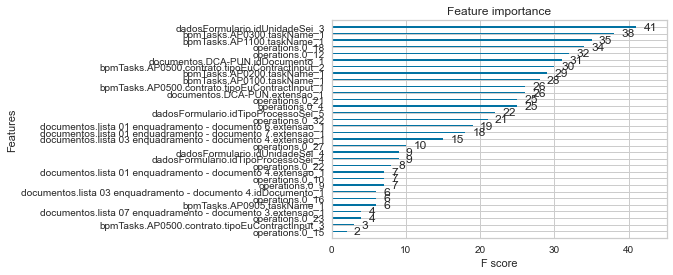

In [112]:
# Visualização de Gráfico da Importância dos Atributos

import xgboost
fig, ax = plt.subplots(figsize=(6, 4))
xgboost.plot_importance(xgb, ax=ax)
#fig.savefig("images/mlpr_1005.png", dpi=300)

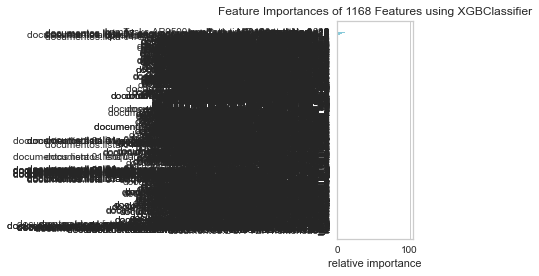

<AxesSubplot:title={'center':'Feature Importances of 1168 Features using XGBClassifier'}, xlabel='relative importance'>

In [120]:
# Visualização de Gráfico da Importâncias dos Atributos, com yellowbrick

fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgb)
fi_viz.fit(X_xgb, y_xgb)
fi_viz.poof()
#fig.savefig("images/mlpr_1006.png", dpi=300)

In [121]:
# Representação textual das árvores

booster = xgb.get_booster()
print(booster.get_dump()[0])

0:[bpmTasks.AP0500.contrato.tipoEuContractInput_2<1] yes=1,no=2,missing=1
	1:[operations.0_9<1] yes=3,no=4,missing=3
		3:[operations.0_10<1] yes=7,no=8,missing=7
			7:leaf=-0.596472979
			8:leaf=0.360000014
		4:leaf=0.440000027
	2:[bpmTasks.AP0300.taskName_1<1] yes=5,no=6,missing=5
		5:[documentos.lista 01 enquadramento - documento 6.extensao_1<1] yes=9,no=10,missing=9
			9:[operations.0_12<1] yes=13,no=14,missing=13
				13:leaf=-0.4909091
				14:[documentos.lista 03 enquadramento - documento 4.extensao_1<1] yes=17,no=18,missing=17
					17:leaf=-0.300000012
					18:leaf=0.333333373
			10:leaf=0.200000018
		6:[bpmTasks.AP1100.taskName_1<1] yes=11,no=12,missing=11
			11:leaf=-0.272727281
			12:[operations.0_23<1] yes=15,no=16,missing=15
				15:[operations.0_18<1] yes=19,no=20,missing=19
					19:leaf=0.534246624
					20:[documentos.DCA-PUN.extensao_1<1] yes=21,no=22,missing=21
						21:leaf=-0.24000001
						22:leaf=0.342857182
				16:leaf=-0.300000012



In [123]:
# score from first tree leaf 7
# 1 / (1 + np.exp(-1 * 0.1238))

<AxesSubplot:>

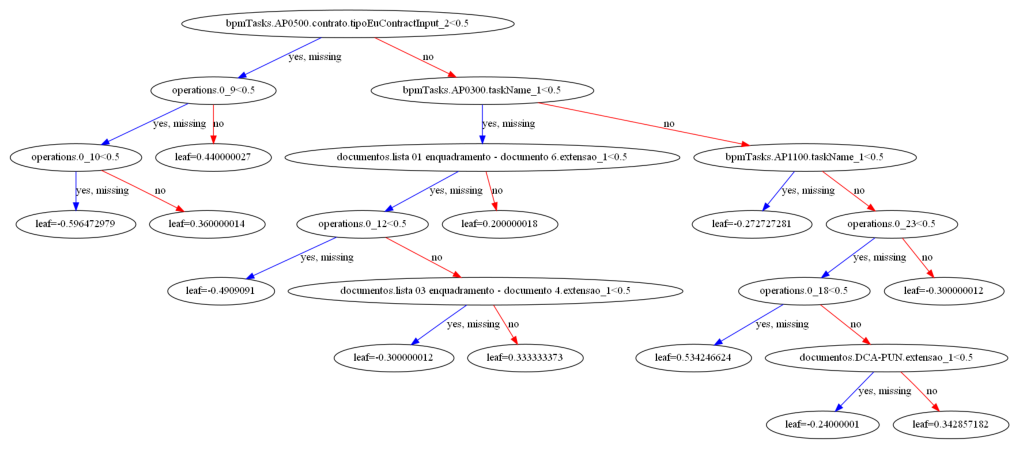

In [129]:
# Versão gráfica da primeira árvore do modelo

fig, ax = plt.subplots(figsize=(18, 12))
xgboost.plot_tree(xgb, ax=ax, num_trees=0)
#fig.savefig("images/mlpr_1007.png", dpi=300)

In [167]:
# Importância das colunas por medidas

import xgbfir
xgbfir.saveXgbFI(
    xgb,
    feature_names=X_xgb.columns,
    OutputXlsxFile="fir.xlsx",
)
pd.read_excel("fir.xlsx").head(10).T

0  \
Interaction         bpmTasks.AP0500.contrato.tipoEuContractInput_2   
Gain                                                    431.016421   
FScore                                                          30   
wFScore                                                  22.785973   
Average wFScore                                           0.759532   
Average Gain                                             14.367214   
Expected Gain                                           424.061588   
Gain Rank                                                        1   
FScore Rank                                                      7   
wFScore Rank                                                     2   
Avg wFScore Rank                                                 3   
Avg Gain Rank                                                    2   
Expected Gain Rank                                               1   
Average Rank                                              2.666667   
Average Tree Index                                            36.7   
Average Tree Depth                                        1.733333   

                                             1                           2  \
Interaction         bpmTasks.AP0100.taskName_1  bpmTasks.AP0300.taskName_1   
Gain                                368.354435                  112.919094   
FScore                                      28                          38   
wFScore                              27.860517                   14.302206   
Average wFScore                       0.995018                    0.376374   
Average Gain                         13.155516                    2.971555   
Expected Gain                       368.135226                    7.268653   
Gain Rank                                    2                           3   
FScore Rank                                  9                           2   
wFScore Rank                                 1                           7   
Avg wFScore Rank                             1                          20   
Avg Gain Rank                                3                           6   
Expected Gain Rank                           2                           6   
Average Rank                               3.0                    7.333333   
Average Tree Index                        14.5                        34.5   
Average Tree Depth                    0.321429                    2.868421   

                                 3                4                5  \
Interaction         operations.0_9  operations.0_10  operations.0_12   
Gain                    102.365191        64.905865        55.854623   
FScore                           7                7               32   
wFScore                   4.614704         4.324172        13.292188   
Average wFScore           0.659243         0.617739         0.415381   
Average Gain             14.623599         9.272266         1.745457   
Expected Gain            91.388916         51.11586         7.303062   
Gain Rank                        4                5                6   
FScore Rank                     23               24                5   
wFScore Rank                    20               21                8   
Avg wFScore Rank                 7                8               16   
Avg Gain Rank                    1                4                7   
Expected Gain Rank               3                4                5   
Average Rank              9.666667             11.0         7.833333   
Average Tree Index        4.714286         4.142857             22.5   
Average Tree Depth        1.571429         3.142857          2.28125   

                                             6               7  \
Interaction         bpmTasks.AP1100.taskName_1  operations.0_4   
Gain                                   55.2609       36.967871   
FScore                                      35              25   
wFScore                              10.859638        8.62

In [149]:
# Interações entre pares de colunas, por medidas

pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 1",
).head(10).T

0  \
Interaction         bpmTasks.AP0300.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2   
Gain                                                                               537.016567   
FScore                                                                                     15   
wFScore                                                                              5.396526   
Average wFScore                                                                      0.359768   
Average Gain                                                                        35.801104   
Expected Gain                                                                        24.08491   
Gain Rank                                                                                   1   
FScore Rank                                                                                 4   
wFScore Rank                                                                                5   
Avg wFScore Rank                                                                           46   
Avg Gain Rank                                                                               2   
Expected Gain Rank                                                                          5   
Average Rank                                                                             10.5   
Average Tree Index                                                                  20.466667   
Average Tree Depth                                                                   2.066667   

                                                                                1  \
Interaction         bpmTasks.AP0500.contrato.tipoEuContractInput_2|operations.0_9   
Gain                                                                   517.216052   
FScore                                                                          5   
wFScore                                                                  4.096169   
Average wFScore                                                          0.819234   
Average Gain                                                            103.44321   
Expected Gain                                                          494.342701   
Gain Rank                                                                       2   
FScore Rank                                                                    25   
wFScore Rank                                                                    9   
Avg wFScore Rank                                                                6   
Avg Gain Rank                                                                   1   
Expected Gain Rank                                                              1   
Average Rank                                                             7.333333   
Average Tree Index                                                            3.2   
Average Tree Depth                                                            1.2   

                                                                        2  \
Interaction         bpmTasks.AP0300.taskName_1|bpmTasks.AP1100.taskName_1   
Gain                                                           158.989492   
FScore                                                                 16   
wFScore                                                          2.612151   
Average wFScore                                                  0.163259   
Average Gain                                                     9.936843   
Expected Gain                                                    4.640795   
Gain Rank                                                               3   
FScore Rank                                                             3   
wFScore Rank                                                           21   
Avg wFScore Rank                                                       79   
Avg Gain Rank                                                          1

In [169]:
# Interações entre trincas de colunas, por medidas

pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
).head(10).T

0  \
Interaction         bpmTasks.AP0300.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2|bpmTasks.AP1100.taskNa...   
Gain                                                                                                         581.151353   
FScore                                                                                                                8   
wFScore                                                                                                        1.243417   
Average wFScore                                                                                                0.155427   
Average Gain                                                                                                  72.643919   
Expected Gain                                                                                                 15.297733   
Gain Rank                                                                                                             1   
FScore Rank                                                                                                           3   
wFScore Rank                                                                                                         19   
Avg wFScore Rank                                                                                                     60   
Avg Gain Rank                                                                                                         4   
Expected Gain Rank                                                                                                    4   
Average Rank                                                                                                  15.166667   
Average Tree Index                                                                                                 14.0   
Average Tree Depth                                                                                                2.625   

                                                                                                1  \
Interaction         bpmTasks.AP0500.contrato.tipoEuContractInput_2|operations.0_10|operations.0_9   
Gain                                                                                   565.553345   
FScore                                                                                          4   
wFScore                                                                                  3.825411   
Average wFScore                                                                          0.956353   
Average Gain                                                                           141.388336   
Expected Gain                                                                          541.728707   
Gain Rank                                                                                       2   
FScore Rank                                                                                    10   
wFScore Rank                                                                                    1   
Avg wFScore Rank                                                                                1   
Avg Gain Rank                                                                                   1   
Expected Gain Rank                                                                              1   
Average Rank                                                                             2.666667   
Average Tree Index                                                                            1.5   
Average Tree Depth                                                                            2.0   

                                                                                                                      2  \
Interaction         bpmTasks.AP0300.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2|documentos.lista 01 en...   
Gain                                                          

In [344]:
# Interações entre trincas de colunas, por medidas, pela planilha

pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
)[["Interaction", "Gain"]]#.head()

Interaction  \
0   bpmTasks.AP0300.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2|bpmTasks.AP1100.taskNa...   
1                         bpmTasks.AP0500.contrato.tipoEuContractInput_2|operations.0_10|operations.0_9   
2   bpmTasks.AP0300.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2|documentos.lista 01 en...   
3   bpmTasks.AP0300.taskName_1|documentos.lista 01 enquadramento - documento 6.extensao_1|operations...   
4                                            bpmTasks.AP0100.taskName_1|operations.0_12|operations.0_21   
..                                                                                                  ...   
95  dadosFormulario.idTipoProcessoSei_5|documentos.lista 03 enquadramento - documento 4.extensao_1|o...   
96  bpmTasks.AP0500.contrato.tipoEuContractInput_2|bpmTasks.AP1100.taskName_1|documentos.DCA-PUN.ext...   
97            bpmTasks.AP0200.taskName_1|bpmTasks.AP0500.contrato.tipoEuContractInput_2|operations.0_27   
98        documentos.lista 03 enquadramento - documento 4.idDocumento_1|operations.0_12|operations.0_27   
99                  bpmTasks.AP0905.taskName_1|bpmTasks.AP1100.taskName_1|documentos.DCA-PUN.extensao_1   

          Gain  
0   581.151353  
1   565.553345  
2   540.965290  
3   135.097055  
4   114.859261  
..         ...  
95    1.943554  
96    1.938159  
97    1.924410  
98    1.920672  
99    1.893236  

[100 rows x 2 columns]

### 5.5. Seleção do modelo
Foi escolhido o modelo de Floresta Aleatória para aplicar na solução.

#### Análise sobre os parâmetros:

In [347]:
# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rotulo_otimizacao = rotuloPossuiErro

X_otimizacao = X_dataframes_concat[rotulo_otimizacao]
y_otimizacao = y_series_concat[rotulo_otimizacao]

X_train_otimizacao = X_train_dataframes[rotulo_otimizacao]
y_train_otimizacao = y_train_series[rotulo_otimizacao]

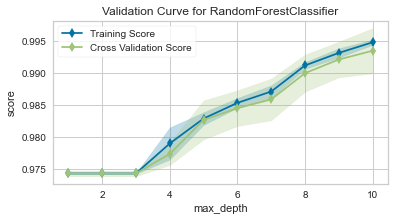

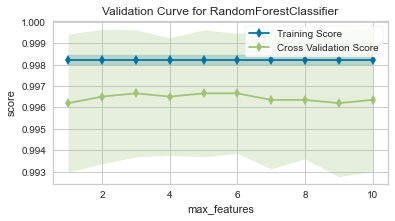

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, 

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, 

c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\bianca porto\env3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\bianca porto\env3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, 

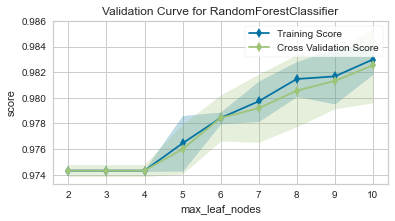

In [348]:
# Visualização de gráficos de Curva de Validação, por Hiperparâmetros

from yellowbrick.model_selection import (
    ValidationCurve,
)

def plota_grafico(param_name, min_value, max_value, n_estimators):
    fig, ax = plt.subplots(figsize=(6, 3))
    vc_viz = ValidationCurve(
        RandomForestClassifier(n_estimators=n_estimators),
        param_name=param_name,
        param_range=np.arange(min_value, max_value),
        cv=10,
        n_jobs=-1,
    )
    vc_viz.fit(X_otimizacao, y_otimizacao)
    vc_viz.poof()

plota_grafico('max_depth', 1, 11, 100)
plota_grafico('max_features', 1, 11, 100)
plota_grafico('max_leaf_nodes', 1, 11, 100)

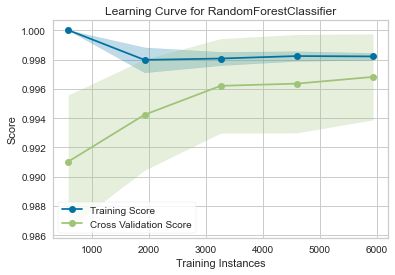

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [350]:
# Visualização de gráfico de Curva de Aprendizagem

from yellowbrick.model_selection import (
    LearningCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100),
    cv=10,
)
lc3_viz.fit(X_otimizacao, y_otimizacao)
lc3_viz.poof()
#fig.savefig("images/mlpr_1102.png", dpi=300)

# outra forma: 
#import numpy as np
#fig, ax = plt.subplots(figsize=(6, 4))
#cv = StratifiedKFold(12)
#sizes = np.linspace(0.3, 1.0, 10)
#lc_viz = LearningCurve(
#    #rf5,
#    RandomForestClassifier(n_estimators=100),
#    cv=cv,
#    train_sizes=sizes,
#    scoring="f1_weighted",
#    n_jobs=4,
#    ax=ax,
#)
#lc_viz.fit(X_otimizacao, y_otimizacao)
#lc_viz.poof()

#### Verificação de parâmetros:

In [361]:
# Verificação dos melhores Hiperparâmetros 'max_depth', 'max_features' e 'max_leaf_nodes' do modelo de de Floresta Aleatória

from sklearn import model_selection

# melhores hiperparâmetros
rf_teste_hiperparametros = ensemble.RandomForestClassifier()
params = {
    #"max_features": [0.4, "auto"],
    #"n_estimators": [15, 200],
    #"min_samples_leaf": [1, 0.1],
    #"random_state": [42],
    "max_depth": [10, None],
    "max_features": [10, "auto"],
    "max_leaf_nodes": [10, None]    
}
cv = model_selection.GridSearchCV(
    rf_teste_hiperparametros, params, n_jobs=-1
).fit(X_train_otimizacao, y_train_otimizacao)

print("Melhores hiperparâmetros: ")
print(cv.best_params_)

# score
#rf5 = ensemble.RandomForestClassifier(
#    **{
#        "max_features": "auto",
#        "min_samples_leaf": 0.1,
#        "n_estimators": 200,
#        "random_state": 42,
#    }
#)

Melhores hiperparâmetros: 
{'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None}


#### Otimização do Modelo:
Como os melhores hiperparâmetros se mantiveram nos mesmos padrões do Classificador Random Forest, optou-se por não alterá-los, pois o modelo já se encontra otimizado.

In [183]:
# Associação do modelo já existente em variável de modelo otimizado
rf_otimizada = rf

---

## 6. Avaliação do modelo

In [237]:
# Variáveis a serem utilizadas

# opções de rótulos: 'rotuloPossuiErro', 'rotuloErroComplementoDocs', 'rotuloErroComplementoPrancha', 'rotuloErroDocumentoInvalido', 'rotuloExpedienteUnicoInvalido', 'rotuloIndeferimentoExpedienteUnico'
rotulo_avaliacao = rotuloPossuiErro

X_avaliacao = X_dataframes_concat[rotulo_avaliacao]
y_avaliacao = y_series_concat[rotulo_avaliacao]

X_test_avaliacao = X_test_dataframes[rotulo_avaliacao]
y_test_avaliacao = y_test_series[rotulo_avaliacao]

X_train_avaliacao = X_train_dataframes[rotulo_avaliacao]
y_train_avaliacao = y_train_series[rotulo_avaliacao]

In [270]:
# Matriz de Confusão

y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
tp = (
    (y_test_avaliacao == 1) & (y_test_avaliacao == y_predict_avaliacao)
).sum()
tn = (
    (y_test_avaliacao == 0) & (y_test_avaliacao == y_predict_avaliacao)
).sum()
fp = (
    (y_test_avaliacao == 0) & (y_test_avaliacao != y_predict_avaliacao)
).sum()
fn = (
    (y_test_avaliacao == 1) & (y_test_avaliacao != y_predict_avaliacao)
).sum()

print("True-Positives: " + str(tp))
print("True-Negatives: " + str(tn))
print("False-Positives: " + str(fp))
print("False-Negatives: " + str(fn))

True-Positives: 42
True-Negatives: 1925
False-Positives: 2
False-Negatives: 6


In [194]:
# Visualização da Matriz de Confusão em tabela

from sklearn.metrics import confusion_matrix
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
pd.DataFrame(
    confusion_matrix(y_test_avaliacao, y_predict_avaliacao),
    columns=[
        "Predict sem_erro",
        "Predict com_erro",
    ],
    index=["True sem_erro", "True com_erro"],
)

Predict sem_erro  Predict com_erro
True sem_erro              1925                 2
True com_erro                 6                42

c:\users\bianca porto\env3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


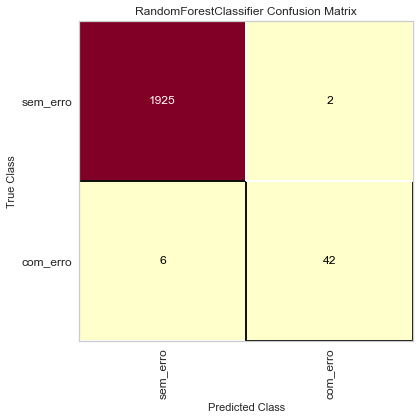

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [222]:
# Gráfico de Matriz de Confusão

import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ConfusionMatrix,
)
mapping = {0: "sem_erro", 1: "com_erro"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf_otimizada,
    classes=["sem_erro", "com_erro"],
    label_encoder=mapping,
)
cm_viz.score(X_test_avaliacao, y_test_avaliacao)
cm_viz.poof()
#fig.savefig("images/mlpr_1202.png", dpi=300)

In [203]:
# Acurácia

#accuracy = (tp + tn) / (tp + tn + fp + fn)
from sklearn.metrics import accuracy_score
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
accuracy = accuracy_score(y_test_avaliacao, y_predict_avaliacao)

print("Acurácia: " + str(accuracy))

Acurácia: 0.9959493670886076


In [206]:
# Revocação

#recall = tp / (tp + fn)

from sklearn.metrics import recall_score
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
recall = recall_score(y_test_avaliacao, y_predict_avaliacao)

print("Revocação: " + str(recall))

Revocação: 0.875


In [208]:
# Precisão

#precision = tp / (tp + fp)

from sklearn.metrics import precision_score
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
precision = precision_score(y_test_avaliacao, y_predict_avaliacao)

print("Precisão: " + str(precision))

Precisão: 0.9545454545454546


In [211]:
# F1

#pre = tp / (tp + fp)
#rec = tp / (tp + fn)
#f1 = (2 * pre * rec) / (pre + rec)

from sklearn.metrics import f1_score
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
f1 = f1_score(y_test_avaliacao, y_predict_avaliacao)

print("F1: " + str(f1))

F1: 0.9130434782608695


c:\users\bianca porto\env3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


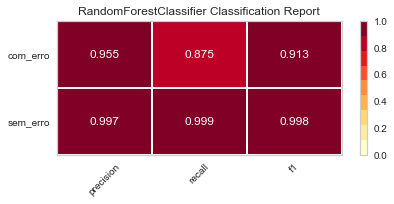

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [212]:
# Relatório de Classificação

import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ClassificationReport,
)
fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(
    rf_otimizada,
    classes=["sem_erro", "com_erro"],
    label_encoder=mapping,
)
cm_viz.score(X_test_avaliacao, y_test_avaliacao)
cm_viz.poof()
#fig.savefig("images/mlpr_1203.png", dpi=300)

In [223]:
# Cálculo de Área sob a Curva (AUC)

from sklearn.metrics import roc_auc_score
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
auc = roc_auc_score(y_test_avaliacao, y_predict_avaliacao)

print("AUC: " + str(auc))

AUC: 0.9369810586403736


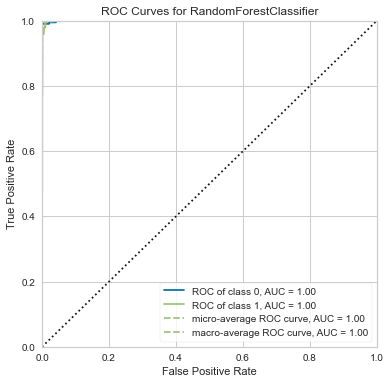

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [256]:
# Curva ROC

from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))

roc_viz = ROCAUC(rf_otimizada)#, classes=["sem_erro", "com_erro"])
roc_viz.fit(X_train_avaliacao, y_train_avaliacao)
roc_viz.score(X_test_avaliacao, y_test_avaliacao)
roc_viz.poof()
#fig.savefig("images/mlpr_1204.png", dpi=300)

#de outra forma:
#
#from yellowbrick.classifier import ROCAUC
#plt.figure(figsize=(10,6))
#plt.title("ROC Curve and AUC", fontsize=18)
#plt.xlabel("False Positive Rate", fontsize=16)
#plt.ylabel("True Positive Rate", fontsize=16)
#visualizer = ROCAUC(rf, classes=["sem_erro", "com_erro"])
#visualizer.fit(X_train_avaliacao, y_train_avaliacao)
#visualizer.score(X_test_avaliacao, y_test_avaliacao)
#plt.legend()

In [261]:
# Curva de Precisão-Recall

from sklearn.metrics import (
    average_precision_score,
)
y_predict_avaliacao = rf_otimizada.predict(X_test_avaliacao)
aps = average_precision_score(y_test_avaliacao, y_predict_avaliacao)
print("Precisão-Recall: " + str(aps))

Precisão-Recall: 0.838265247410817


0.6777497581896731


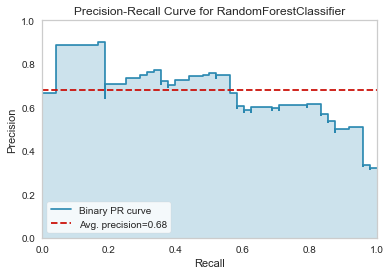

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [260]:
# Gráfico de Curva de Precisão-Recall

from yellowbrick.classifier import (
    PrecisionRecallCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
viz = PrecisionRecallCurve(
    RandomForestClassifier(max_depth=3)
)
viz.fit(X_train_avaliacao, y_train_avaliacao)
print(viz.score(X_test_avaliacao, y_test_avaliacao))
viz.poof()
#fig.savefig("images/mlpr_1205.png", dpi=300)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

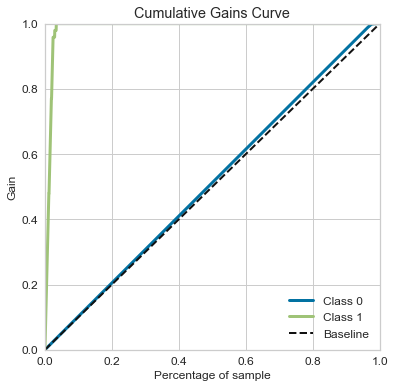

In [272]:
# Gráfico de Ganhos Cumulativos

import scikitplot
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = rf_otimizada.predict_proba(X_test_avaliacao)
scikitplot.metrics.plot_cumulative_gain(
    y_test_avaliacao, y_probas, ax=ax
)
# fig.savefig(
#     "images/mlpr_1206.png",
#     dpi=300,
#     bbox_inches="tight",
# )

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

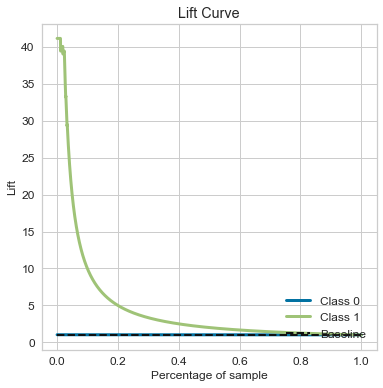

In [276]:
# Gráfico de Elevação

fig, ax = plt.subplots(figsize=(6, 6))
y_probas = rf_otimizada.predict_proba(X_test_avaliacao)
scikitplot.metrics.plot_lift_curve(
    y_test_avaliacao, y_probas, ax=ax
)
# fig.savefig(
#     "images/mlpr_1207.png",
#     dpi=300,
#     bbox_inches="tight",
# )

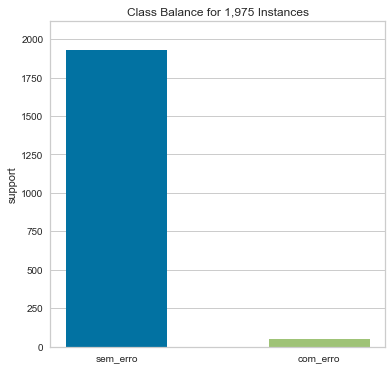

<AxesSubplot:title={'center':'Class Balance for 1,975 Instances'}, ylabel='support'>

In [279]:
# Gráfico de Balanceamento das Classes

from yellowbrick.classifier import ClassBalance
fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(
    labels=["sem_erro", "com_erro"]
)
cb_viz.fit(y_test_avaliacao)
cb_viz.poof()
#fig.savefig("images/mlpr_1208.png", dpi=300)

c:\users\bianca porto\env3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


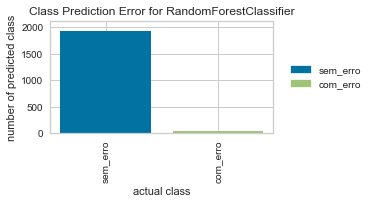

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [280]:
# Gráfico de Erro de Predição de Classe

from yellowbrick.classifier import (
    ClassPredictionError,
)
fig, ax = plt.subplots(figsize=(6, 3))
cpe_viz = ClassPredictionError(
    rf_otimizada, classes=["sem_erro", "com_erro"]
)
cpe_viz.score(X_test_avaliacao, y_test_avaliacao)
cpe_viz.poof()
#fig.savefig("images/mlpr_1209.png", dpi=300)

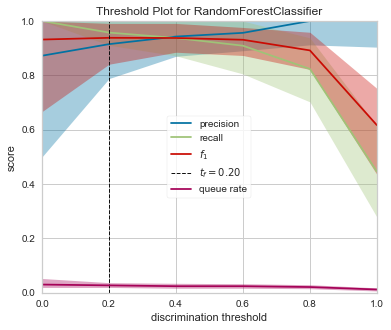

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [281]:
# Gráfico de Limiar de Discriminação

from yellowbrick.classifier import (
    DiscriminationThreshold,
)
fig, ax = plt.subplots(figsize=(6, 5))
dt_viz = DiscriminationThreshold(rf_otimizada)
dt_viz.fit(X_avaliacao, y_avaliacao)
dt_viz.poof()
#fig.savefig("images/mlpr_1210.png", dpi=300)

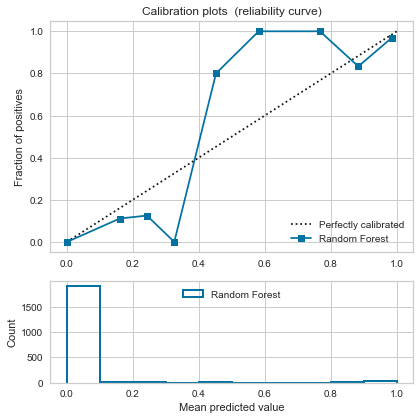

In [285]:
# Curva de Confiabilidade

from sklearn.calibration import (
    calibration_curve,
)
def calib_plot(clf, name, X_test, X_train, y_train, y_test):
    fig = plt.figure(figsize=(6, 6))
    ax1 = plt.subplot2grid(
        (3, 1), (0, 0), rowspan=2
    )
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot(
        [0, 1],
        [0, 1],
        "k:",
        label="Perfectly calibrated",
    )
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[
            :, 1
        ]
    else:  # use decision function
        prob_pos = clf.decision_function(
            X_test
        )
        prob_pos = (
            prob_pos - prob_pos.min()
        ) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test, prob_pos, n_bins=10
    )
    ax1.plot(
        mean_predicted_value,
        fraction_of_positives,
        "s-",
        label="%s" % (name,),
    )
    ax2.hist(
        prob_pos,
        range=(0, 1),
        bins=10,
        label=name,
        histtype="step",
        lw=2,
    )
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(
        "Calibration plots  (reliability curve)"
    )
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    plt.tight_layout()
    plt.show()
    return fig

#fig = calib_plot(dt, "Decision Tree", X_test)
fig = calib_plot(rf_otimizada, "Random Forest", X_test_avaliacao, X_train_avaliacao, y_train_avaliacao, y_test_avaliacao)
#fig.savefig("images/cp.png", dpi=300)

---

## 7. Implantação do modelo

In [293]:
# Variáveis a serem utilizadas
X_test_implantacao = X_test_avaliacao
y_test_implantacao = y_test_avaliacao

# Código para uso na implantação do modelo
import pickle
pic = pickle.dumps(rf_otimizada)
modelo_implantacao = pickle.loads(pic)
y_pred = modelo_implantacao.predict(X_test_implantacao)
roc_auc_score(y_test_implantacao, y_pred)

0.9369810586403736


---